## SOMPO SİGORTA CASE STUDY ÇALIŞMASI - Actuarial Data Scientist / Pricing Analyst pozisyonu
### RABİA İNCİ ERYILMAZ

In [1160]:
# GEREKLİ KÜTÜPHANELER
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency # ki-kare testi için
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [1161]:
data=pd.read_csv("Case_Study_Data.xlsx - DATA.csv")
df=data.copy()
df.head()

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,MODEL YILI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,15235,0%,7,MERCEDES,4,2020,DIZEL,ANKARA,KEÇİÖREN,29,18.743,YENİLEME,O,T
1,15236,30%,8,MERCEDES,1,2023,BENZİN,İSTANBUL,TUZLA,41,13.778,YENİ İŞ,O,T
2,15237,30%,6,FORD,2,2022,DIZEL,İSTANBUL,SULTANGAZİ,43,7.814,YENİ İŞ,O,T
3,15238,30%,5,RENAULT,1,2023,DIZEL,İZMİR,NaN,0,17.733,YENİ İŞ,T,T
4,15239,30%,7,VOLKSWAGEN,1,2023,BENZİN,ANKARA,ÇANKAYA,43,10.306,YENİ İŞ,O,T


#### Veri seti bilgisi:
| Sütun Adı                     | Açıklama                                                                                                                                           |
|--------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| TEKLİF NUMARASI                | Teklifin sistemdeki unique numarası                                                                                                               |
| HASARSIZLIK İNDİRİMİ KADEMESİ  | Müşterinin kasko hasarsızlık indirimi kademesini temsil eder. (0 ile başlar, hasarsız her yıl artış gösterir, hasar durumunda düşer)              |
| TRAFİK BASAMAK KODU            | Müşterinin trafik hasarsızlık basamağını temsil eder. (4 ile başlar, hasarsız her yıl artış gösterir, hasar durumunda düşer)                      |
| MARKA                          | Aracın markası                                                                                                                                   |
| ARAÇ YAŞI                      | Aracın yaşı                                                                                                                                      |
| MODEL YILI                     | Aracın model yılı                                                                                                                                |
| YAKIT TİPİ                     | Aracın yakıt tipi                                                                                                                                |
| İL                             | Sigortalının ili                                                                                                                                 |
| İLÇE                           | Sigortalının ilçesi                                                                                                                              |
| YAŞ                            | Sigortalının yaşı                                                                                                                                |
| TEKLİF PRİMİ                   | Sigortalının teklif primi                                                                                                                        |
| PORTFÖY AYRIMI                 | Poliçenin şirkette tekabül ettiği portföy alanı                                                                                                  |
| SİGORTALI TİPİ                 | Sigortalının özel - tüzel müşteri olma durumu ayrımı (**O= bireysel sigortalı, T= kurumsal sigortalı**)                                                                                            |
| TEKLİF ONAY DURUMU             | Sigortalıya sunulan teklifin onaylanma veya onaylanmama durumu (**T → Onaylanmadı, P → Onaylandı**)                                              |

In [1162]:
df.shape

(19085, 14)

In [1163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19085 entries, 0 to 19084
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TEKLİF NUMARASI                19085 non-null  int64  
 1   HASARSIZLIK İNDİRİMİ KADEMESİ  19085 non-null  object 
 2   TRAFİK BASAMAK KODU            19085 non-null  int64  
 3   MARKA                          19085 non-null  object 
 4   ARAÇ YAŞI                      19085 non-null  int64  
 5   MODEL YILI                     19085 non-null  int64  
 6   YAKIT TİPİ                     19085 non-null  object 
 7   İL                             19085 non-null  object 
 8   İLÇE                           13830 non-null  object 
 9   YAŞ                            19085 non-null  int64  
 10  TEKLİF PRİMİ                   19085 non-null  float64
 11  PORTFÖY AYRIMI                 19085 non-null  object 
 12  SİGORTALI TİPİ                 19085 non-null 

In [1164]:
df.isnull().sum()

TEKLİF NUMARASI                     0
HASARSIZLIK İNDİRİMİ KADEMESİ       0
TRAFİK BASAMAK KODU                 0
MARKA                               0
ARAÇ YAŞI                           0
MODEL YILI                          0
YAKIT TİPİ                          0
İL                                  0
İLÇE                             5255
YAŞ                                 0
TEKLİF PRİMİ                        0
PORTFÖY AYRIMI                      0
SİGORTALI TİPİ                      0
TEKLİF ONAY DURUMU                  0
dtype: int64

In [1165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TEKLİF NUMARASI,19085.0,24910.144040,5584.407597,15235.000,20079.000,24907.000,29749.000,34570.000
TRAFİK BASAMAK KODU,19085.0,5.849044,1.410988,1.000,5.000,6.000,7.000,8.000
ARAÇ YAŞI,19085.0,2.572334,1.379313,0.000,1.000,2.000,4.000,5.000
MODEL YILI,19085.0,2021.427666,1.379313,2019.000,2020.000,2022.000,2023.000,2024.000
YAŞ,19085.0,30.695048,20.837731,0.000,0.000,36.000,47.000,64.000
TEKLİF PRİMİ,19085.0,14.393647,15.957490,2.748,8.654,11.048,15.243,646.562


- İlçe değişkeninde eksik değerler var bakalım
- Yaş değişkeni 0-64 arasında 18 altında olmaması gerekiyor bakalım
- Trafik basamak kodu 4 den başlar deniliyordu 1-8 arasında bakalım
- Hasarsızlık indirim kademesi string float a çevirelim
- Model yılı ve araç yaşı tutarlıysa birini çıkaralım
- Teklif primi min-max değerleri arasında çok fark var aykırı değerler olabilir
- Teklif numarası kontrol edelim, tüm satırlar eşsiz gözlemi mi ifade ediyor

In [1166]:
# "İLÇE" sütununda boş (NaN) olan satırlara bakalım
missing_ilce = df[df["İLÇE"].isnull()]
missing_ilce

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,MODEL YILI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
3,15238,30%,5,RENAULT,1,2023,DIZEL,İZMİR,NaN,0,17.733,YENİ İŞ,T,T
11,15246,40%,6,MERCEDES,2,2022,DIZEL,ANKARA,NaN,0,22.488,YENİ İŞ,T,T
15,15250,30%,6,VOLKSWAGEN,2,2022,BENZİN,ANKARA,NaN,0,18.105,YENİ İŞ,T,P
16,15251,30%,4,FORD,2,2022,DIZEL,ANKARA,NaN,0,10.419,YENİ İŞ,T,T
18,15253,50%,7,FORD,3,2021,DIZEL,ANKARA,NaN,0,13.921,YENİ İŞ,T,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19071,34557,30%,5,RENAULT,1,2023,DIZEL,İSTANBUL,NaN,0,10.335,YENİ İŞ,T,T
19075,34561,0%,1,MERCEDES,5,2019,DIZEL,İSTANBUL,NaN,0,65.370,İLK DEFA SİGORTALI,T,T
19076,34562,0%,7,MERCEDES,3,2021,DIZEL,ANKARA,NaN,0,24.612,İLK DEFA SİGORTALI,T,T
19078,34564,0%,7,VOLKSWAGEN,4,2020,BENZİN,İSTANBUL,NaN,0,23.763,YENİ İŞ,T,T


İlçe değişkeni boş olanların yaşı sıfır ve sigortalı tipi T yani kurumsal hepsi için öyle mi? kontrol edelim

In [1167]:
# Sadece kurumsallar
df_kurumsal = df[df["SİGORTALI TİPİ"] == "T"].copy()

# 1) İlçe bilgisinde boş olanların sayısı
print("İlçe bilgisi boş olanlar:", df_kurumsal["İLÇE"].isna().sum())

# 2) Yaş bilgisi 0 olanların sayısı
print("Yaş=0 olanlar:", (df_kurumsal["YAŞ "] == 0).sum())

# 3) Toplam satır sayısı
print("Toplam kurumsal:", len(df_kurumsal))

İlçe bilgisi boş olanlar: 5255
Yaş=0 olanlar: 5255
Toplam kurumsal: 5255


In [1168]:
# Hem ilçe boş hem yaş=0 olanlar
mask = df_kurumsal["İLÇE"].isna() & (df_kurumsal["YAŞ "] == 0)
print("İlçe boş ve yaş=0 olanlar:", mask.sum())

# Karşılaştırma
if mask.sum() == len(df_kurumsal):
    print("Evet ✅ Tüm kurumsal kayıtlarında ilçe boş ve yaş=0 aynı satırlarda.")
else:
    print("Hayır ❌ Bazı farklılıklar var.")

İlçe boş ve yaş=0 olanlar: 5255
Evet ✅ Tüm kurumsal kayıtlarında ilçe boş ve yaş=0 aynı satırlarda.


Yorumum: Kurumsal sigortalılar için Yaş ve İlçe değişkenlerinin bir belirleyici değişken olmadığı o yüzden modelleme sırasında kurumsal sigortalılar ve bireysel sigortalılar için ayrı tahminleme yapılabilir

In [1169]:
# "TEKLİF NUMARASI" için tekrar eden değer kontrolü yapalım(duplicates)
tekrar_sayisi=df["TEKLİF NUMARASI"].duplicated()
tekrar_sayisi.sum()

0

In [1170]:
# Teklif numarasının modele katkısı olamayacağı için veri setinden çıkaralım
df= df.drop(columns=["TEKLİF NUMARASI"])

In [1171]:
# Model yılı- Araç yaşı sütunları kontrolü 2025 yılı referans alınarak
fark = 2025 - df["MODEL YILI"]
kontrol_2025 = fark == df["ARAÇ YAŞI"]   # True/False seri
print(kontrol_2025.all())  # hepsi eşit mi?

# 2024 yılı baz alınarak
fark = 2024 - df["MODEL YILI"]
kontrol_2024 = fark == df["ARAÇ YAŞI"]   # True/False seri
print(kontrol_2024.all())  # hepsi eşit mi?

False
True


Sonuç: 2024 yılına dayalı bir veri seti ve model yılı ile araç yaşı sütunları tam eşleşme gösterdiğinden veri setinde sadece bir sütun kullanılabilir. Modelde gereksiz karmaşıklık çıkarmaması adına

In [1172]:
df = df.drop(columns=["MODEL YILI"])

# Kalan sütunları kontrol edelim
df.columns.tolist()

['HASARSIZLIK İNDİRİMİ KADEMESİ',
 'TRAFİK BASAMAK KODU',
 'MARKA',
 'ARAÇ YAŞI',
 'YAKIT TİPİ',
 'İL',
 'İLÇE',
 'YAŞ ',
 'TEKLİF PRİMİ',
 'PORTFÖY AYRIMI',
 'SİGORTALI TİPİ',
 'TEKLİF ONAY DURUMU']

In [1173]:
# İndirim yüzdesi müşterinin risk profili ve hasar kaydıyla ilişkisi olabilir ondan sayısal formata çeviriyorum
df["HASARSIZLIK İNDİRİMİ KADEMESİ"] = df["HASARSIZLIK İNDİRİMİ KADEMESİ"].str.replace("%","").astype(float)
df["HASARSIZLIK İNDİRİMİ KADEMESİ"] = df["HASARSIZLIK İNDİRİMİ KADEMESİ"] / 100
df.head()

,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,0.0,7,MERCEDES,4,DIZEL,ANKARA,KEÇİÖREN,29,18.743,YENİLEME,O,T
1,0.3,8,MERCEDES,1,BENZİN,İSTANBUL,TUZLA,41,13.778,YENİ İŞ,O,T
2,0.3,6,FORD,2,DIZEL,İSTANBUL,SULTANGAZİ,43,7.814,YENİ İŞ,O,T
3,0.3,5,RENAULT,1,DIZEL,İZMİR,NaN,0,17.733,YENİ İŞ,T,T
4,0.3,7,VOLKSWAGEN,1,BENZİN,ANKARA,ÇANKAYA,43,10.306,YENİ İŞ,O,T


#### Portföy ayrımına göre trafik basamak kodu ve hasarsızlık indirimi kademesi ayarlaması için
- İlk defa sigortalı = Trafik basamak kodu 4, hasarsızlık indirimi %0.
- Yeni iş = Başka şirketten devrolan basamak kodu + indirim taşır.
- Yenileme = Mevcut şirket içindeki basamak kodu + indirim güncellenir.
- Sıfır araç = Eğer sürücü önceden başka aracında sigortalıysa eski basamak korunur.

In [1174]:
# İlk defa sigortalı olanların trafik basamak kodunu 4 yap
df.loc[df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI", "TRAFİK BASAMAK KODU"] = 4

# İlk defa sigortalı olanların hasarsızlık indirim kademesini 0 yap
df.loc[df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI", "HASARSIZLIK İNDİRİMİ KADEMESİ"] = 0
df.head()

,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,0.0,7,MERCEDES,4,DIZEL,ANKARA,KEÇİÖREN,29,18.743,YENİLEME,O,T
1,0.3,8,MERCEDES,1,BENZİN,İSTANBUL,TUZLA,41,13.778,YENİ İŞ,O,T
2,0.3,6,FORD,2,DIZEL,İSTANBUL,SULTANGAZİ,43,7.814,YENİ İŞ,O,T
3,0.3,5,RENAULT,1,DIZEL,İZMİR,NaN,0,17.733,YENİ İŞ,T,T
4,0.3,7,VOLKSWAGEN,1,BENZİN,ANKARA,ÇANKAYA,43,10.306,YENİ İŞ,O,T


In [1175]:
# İlk defa sigortalı olan ve trafik basamak kodu 4 olmayanlar
hatalilar_trafik = df[
    (df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI") & 
    (df["TRAFİK BASAMAK KODU"] != 4)
]

# İlk defa sigortalı olan ve hasarsızlık indirimi kademesi 0 olmayanlar
hatalilar_hasarsizlik = df[
    (df["PORTFÖY AYRIMI"] == "İLK DEFA SİGORTALI") & 
    (df["HASARSIZLIK İNDİRİMİ KADEMESİ"] != 0)
]

(len(hatalilar_trafik), len(hatalilar_hasarsizlik))

(0, 0)

In [1176]:
df.head()

,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,0.0,7,MERCEDES,4,DIZEL,ANKARA,KEÇİÖREN,29,18.743,YENİLEME,O,T
1,0.3,8,MERCEDES,1,BENZİN,İSTANBUL,TUZLA,41,13.778,YENİ İŞ,O,T
2,0.3,6,FORD,2,DIZEL,İSTANBUL,SULTANGAZİ,43,7.814,YENİ İŞ,O,T
3,0.3,5,RENAULT,1,DIZEL,İZMİR,NaN,0,17.733,YENİ İŞ,T,T
4,0.3,7,VOLKSWAGEN,1,BENZİN,ANKARA,ÇANKAYA,43,10.306,YENİ İŞ,O,T


In [1177]:
# Hedef değişkenimizi "TEKLİF ONAY DURUMU" P=1 (onaylandı), T=0 (onaylanmadı), formatında güncelleyim böylelikle int formatı elde etmiş oluruz
# 0- 1 çevirme sebebimiz model uyumluluğunu artırmak
df["TEKLİF ONAY DURUMU"]=(df["TEKLİF ONAY DURUMU"].astype(str).str.upper()=="P").astype(int)

In [1178]:
# şimdi Teklif onay durumu sütunun kendi içindeki oranına bakalım
class_counts = df["TEKLİF ONAY DURUMU"].value_counts(dropna=False) \
                 .rename_axis("ONAY_DURUMU").reset_index(name="Adet")
class_counts["Oran (%)"] = (class_counts["Adet"] / len(df) * 100).round(2)

class_counts

,ONAY_DURUMU,Adet,Oran (%)
0,0,16711,87.56
1,1,2374,12.44


In [1179]:
# Kolon isimlerini temizleyelim (bir kez yapmak yeterli)
df.columns = df.columns.str.strip()

## VERİ GÖRSELLEŞTİRME

Bakılması gereken durumlar
- teklif onay durumu dağılımı
- teklif primi grafiği aykırı değer var mı
- teklif primi ile onay durumu
- korelasyon analizi
- bireysel sigortalılar için il, ilçe, model türü, yakıt tipi, portföy ayrımı, teklif primini ve onay durumunu nasıl etkiliyor
- kurumsal sigortalılarda il, model türü, yakıt tipi, portföy ayrımı, teklif primini ve onay durumunu nasıl etkiliyor

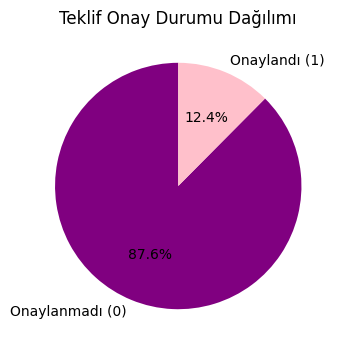

In [1180]:
# Değer sayıları
counts = df["TEKLİF ONAY DURUMU"].value_counts()

# Etiketler
labels = ["Onaylanmadı (0)", "Onaylandı (1)"]

# Pie chart
plt.figure(figsize=(4,4))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=["purple","pink"])
plt.title("Teklif Onay Durumu Dağılımı")
plt.show()

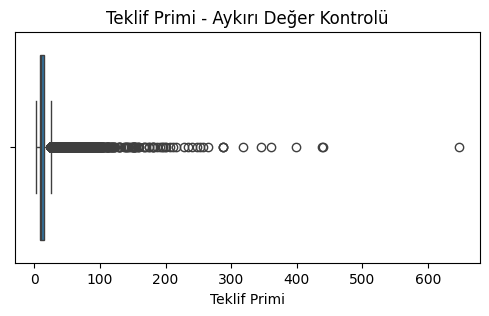

In [1181]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df["TEKLİF PRİMİ"])
plt.title("Teklif Primi - Aykırı Değer Kontrolü")
plt.xlabel("Teklif Primi")
plt.show()

In [1182]:
# Teklif Primi sütunu için değer aralıklarına bakalım
# 100’lük aralıklarla gruplama
max_val = int(df["TEKLİF PRİMİ"].max())   # float → int dönüşümü
bins = list(range(0, max_val + 100, 100))
labels = [f"{i}-{i+100}" for i in bins[:-1]]

# Yeni sütun eklemeden sadece geçici seride aralıkları oluştur
prim_aralik = pd.cut(df["TEKLİF PRİMİ"], bins=bins, labels=labels, right=False)

pivot = prim_aralik.value_counts().sort_index()

# DataFrame formatında görmek için
pivot_df = pivot.reset_index()
pivot_df.columns = ["Prim Aralık", "Frekans"]

print(pivot_df)

  Prim Aralık  Frekans
0       0-100    18980
1     100-200       84
2     200-300       14
3     300-400        4
4     400-500        2
5     500-600        0
6     600-700        1


Teklif Primi Sütunu için yorumlarım
- tekliflerin çoğunluğu 0-100 arasında
- uç değerler var bu da modelin öğrenmesini zorlaştırabilir silmek veya sınır eklemek veri kaybına sebep verebilir ondan log dönüşüm yaparak normalize ederiz ve uç değerlerin etkisi azalır
- modelleme öncesi log dönüşüm yapılmalı

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\603126332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TEKLİF ONAY DURUMU", y="TEKLİF PRİMİ", data=df, palette="Set2")


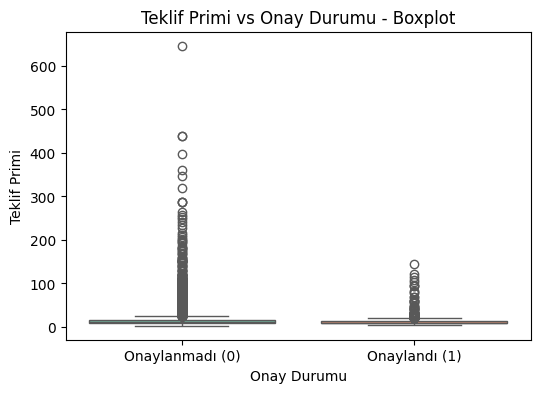

In [1183]:
plt.figure(figsize=(6,4))
sns.boxplot(x="TEKLİF ONAY DURUMU", y="TEKLİF PRİMİ", data=df, palette="Set2")
plt.xticks([0,1], ["Onaylanmadı (0)", "Onaylandı (1)"])
plt.title("Teklif Primi vs Onay Durumu - Boxplot")
plt.xlabel("Onay Durumu")
plt.ylabel("Teklif Primi")
plt.show()

Onaylanan tekliflerin neredeyse tamamı düşük primlerde gerçekleşmektedir. Prim arttıkça reddedilme ihtimali hızla yükselmekte, bu da fiyat duyarlılığının çok yüksek olduğunu göstermektedir.

In [1184]:
# Teklif primi sütununu diğer değişkenlerle beraber incelerken dağılım daha normal olması için log dönüşüm yapalım
# Log dönüşümü (aykırı değer etkisini azaltmak için)
df["TEKLİF PRİMİ"] = np.log1p(df["TEKLİF PRİMİ"])

In [1185]:
# Bireysel sigortalılar (O)
df_bireysel = df[df["SİGORTALI TİPİ"] == "O"].copy()
df_bireysel = df_bireysel.drop(columns=["SİGORTALI TİPİ"])
print("Toplam bireysel müşteri sayısı:", len(df_bireysel))

Toplam bireysel müşteri sayısı: 13830


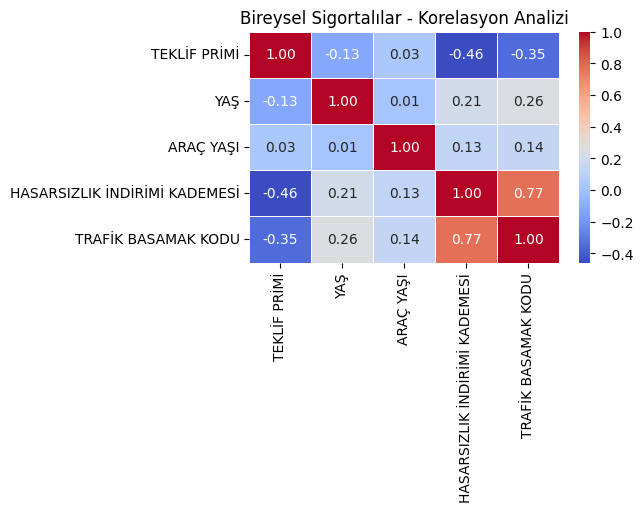

In [1186]:
# Sayısal kolonları seçelim
num_cols = ["TEKLİF PRİMİ", "YAŞ", "ARAÇ YAŞI", 
            "HASARSIZLIK İNDİRİMİ KADEMESİ", "TRAFİK BASAMAK KODU"]

# Korelasyon matrisi
corr = df_bireysel[num_cols].corr()

# Heatmap çizimi
plt.figure(figsize=(5,3))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Bireysel Sigortalılar - Korelasyon Analizi")
plt.show()

- Bireysel müşterilerde teklif primi en çok sürücü geçmişiyle (trafik basamak kodu ve hasarsızlık indirimi) ilişkilidir. Araç yaşı ve müşteri yaşı ise düşük korelasyon göstermektedir.
- Yaş ve araç yaşı, korelasyon açısından zayıf ama dolaylı etkileri olabilir

In [1187]:
# Kurumsal müşteriler
df_kurumsal = df[df["SİGORTALI TİPİ"] == "T"].copy()

# Gereksiz sütunları düşürelim
df_kurumsal = df_kurumsal.drop(columns=["YAŞ", "İLÇE","SİGORTALI TİPİ"])

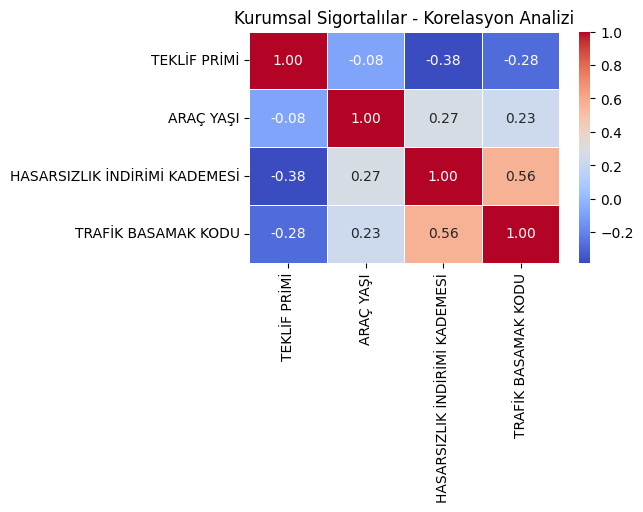

In [1188]:
# Sayısal kolonlar (aynı seçimi kullanalım)
num_cols = ["TEKLİF PRİMİ", "ARAÇ YAŞI", 
            "HASARSIZLIK İNDİRİMİ KADEMESİ", "TRAFİK BASAMAK KODU"]

# Korelasyon matrisi
corr_kurumsal = df_kurumsal[num_cols].corr()

# Heatmap çizimi
plt.figure(figsize=(5,3))
sns.heatmap(corr_kurumsal, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Kurumsal Sigortalılar - Korelasyon Analizi")
plt.show()

Kurumsal müşterilerde prim hesaplaması bireysellere kıyasla daha dağınık. Prim üzerinde en etkili değişkenler yine hasarsızlık indirimi ve trafik basamağıdır; ancak bu etki bireysellere göre daha zayıftır. Araç yaşı kurumsal segmentte daha anlamlıdır.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TEKLİF ONAY DURUMU", y="MARKA", data=brand_onay_bireysel, palette="viridis", ax=axes[0,0])
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\504398626.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `e

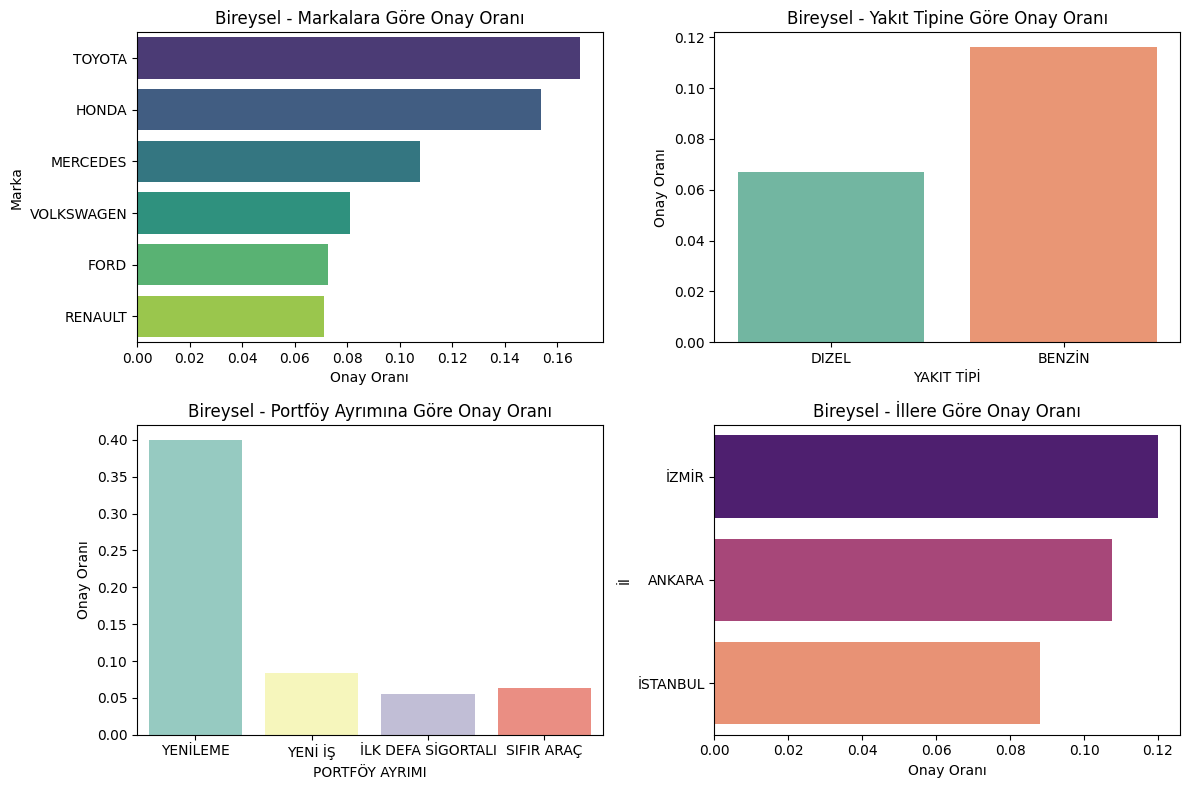

In [1189]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1) Marka bazlı onay oranı
brand_onay_bireysel = (
    df_bireysel.groupby("MARKA")["TEKLİF ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLİF ONAY DURUMU", y="MARKA", data=brand_onay_bireysel, palette="viridis", ax=axes[0,0])
axes[0,0].set_title("Bireysel - Markalara Göre Onay Oranı")
axes[0,0].set_xlabel("Onay Oranı")
axes[0,0].set_ylabel("Marka")

# 2) Yakıt tipine göre onay oranı
sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU", 
            data=df_bireysel, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set2", ax=axes[0,1])
axes[0,1].set_title("Bireysel - Yakıt Tipine Göre Onay Oranı")
axes[0,1].set_ylabel("Onay Oranı")

# 3) Portföy ayrımına göre onay oranı
sns.barplot(x="PORTFÖY AYRIMI", y="TEKLİF ONAY DURUMU", 
            data=df_bireysel, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set3", ax=axes[1,0])
axes[1,0].set_title("Bireysel - Portföy Ayrımına Göre Onay Oranı")
axes[1,0].set_ylabel("Onay Oranı")

# 4) İl bazlı onay oranı
il_onay_bireysel = (
    df_bireysel.groupby("İL")["TEKLİF ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLİF ONAY DURUMU", y="İL", data=il_onay_bireysel, palette="magma", ax=axes[1,1])
axes[1,1].set_title("Bireysel - İllere Göre Onay Oranı")
axes[1,1].set_xlabel("Onay Oranı")
axes[1,1].set_ylabel("İl")

plt.tight_layout()
plt.show()

1) Markalara Göre Onay Oranı:
- Toyota ve Honda gibi markaların onay oranı diğer markalara göre daha yüksek.
- Renault, Ford, Volkswagen gibi markalarda onay oranı daha düşük.
- Bu, müşteri kitlesinin markaya göre risk/fiyat hassasiyetinin değiştiğini gösteriyor.

2) Yakıt Tipine Göre Onay Oranı:
- Benzinli araç sahiplerinin teklif onay oranı dizel araç sahiplerinden belirgin şekilde daha yüksek.
- Bu, dizel araçların daha yüksek primlerle teklif edildiğini veya dizel kullanıcılarının fiyat duyarlılığının daha yüksek olduğunu düşündürüyor.

3) Portföy Ayrımına Göre Onay Oranı:
- En yüksek onay oranı %40 civarında “Yenileme” grubunda.
- “Yeni İş”, “İlk Defa Sigortalı” ve “Sıfır Araç” gruplarında onay oranları %5–10 aralığında çok düşük.
- Yani mevcut müşteriyi elde tutmak çok daha kolay, yeni müşteri kazanımı ise zor.

4) İllere Göre Onay Oranı:
- İzmir’de onay oranı %12 civarında en yüksek.
- Ankara %10, İstanbul ise %8 civarında → İstanbul’da fiyat hassasiyeti daha yüksek olabilir.
- Bu da bölgesel farklılıkların stratejiye dahil edilmesi gerektiğini gösteriyor.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TEKLİF ONAY DURUMU", y="MARKA", data=brand_onay, palette="viridis", ax=axes[0,0])
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU",
C:\Users\incie\AppData\Local\Temp\ipykernel_18312\3365473767.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorb

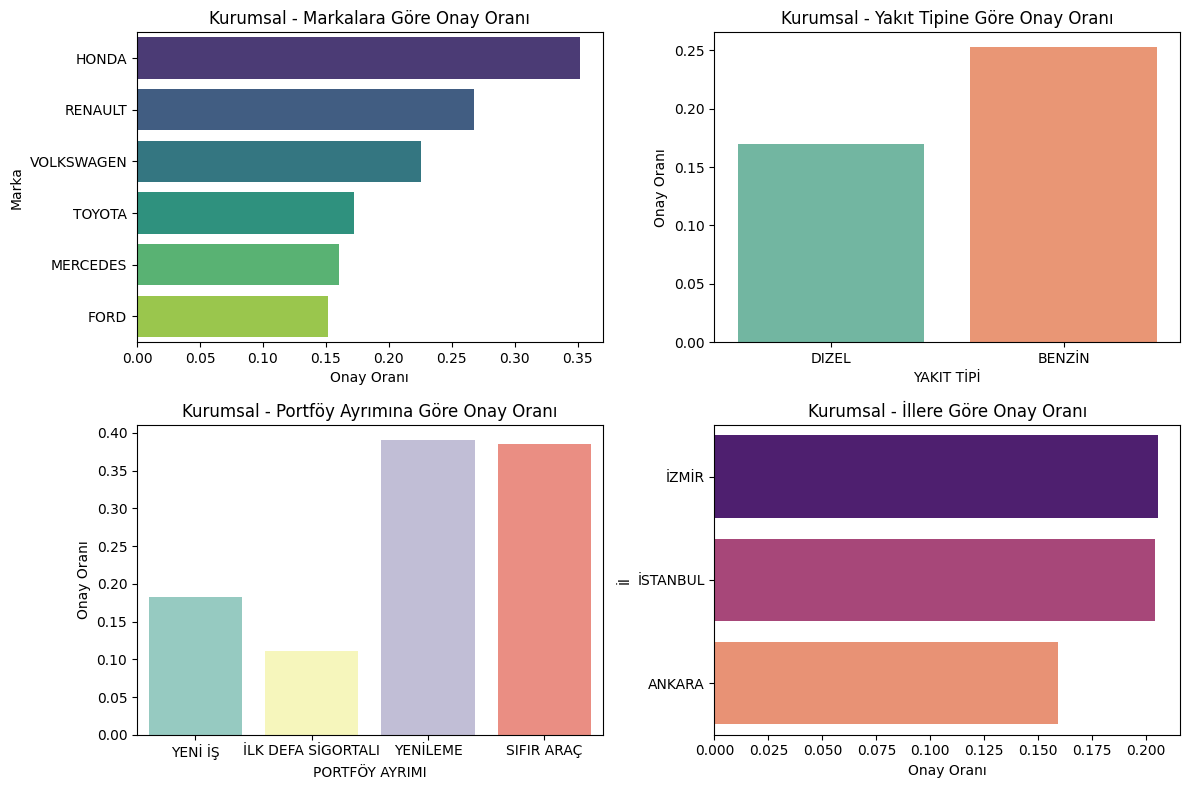

In [1190]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1) Marka bazlı onay oranı
brand_onay = (
    df_kurumsal.groupby("MARKA")["TEKLİF ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLİF ONAY DURUMU", y="MARKA", data=brand_onay, palette="viridis", ax=axes[0,0])
axes[0,0].set_title("Kurumsal - Markalara Göre Onay Oranı")
axes[0,0].set_xlabel("Onay Oranı")
axes[0,0].set_ylabel("Marka")

# 2) Yakıt tipine göre onay oranı
sns.barplot(x="YAKIT TİPİ", y="TEKLİF ONAY DURUMU", 
            data=df_kurumsal, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set2", ax=axes[0,1])
axes[0,1].set_title("Kurumsal - Yakıt Tipine Göre Onay Oranı")
axes[0,1].set_ylabel("Onay Oranı")

# 3) Portföy ayrımına göre onay oranı
sns.barplot(x="PORTFÖY AYRIMI", y="TEKLİF ONAY DURUMU", 
            data=df_kurumsal, estimator=lambda x: sum(x)/len(x), ci=None, palette="Set3", ax=axes[1,0])
axes[1,0].set_title("Kurumsal - Portföy Ayrımına Göre Onay Oranı")
axes[1,0].set_ylabel("Onay Oranı")

# 4) İl bazlı onay oranı (çok il varsa okunaklı olsun diye sıraladık)
il_onay = (
    df_kurumsal.groupby("İL")["TEKLİF ONAY DURUMU"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sns.barplot(x="TEKLİF ONAY DURUMU", y="İL", data=il_onay, palette="magma", ax=axes[1,1])
axes[1,1].set_title("Kurumsal - İllere Göre Onay Oranı")
axes[1,1].set_xlabel("Onay Oranı")
axes[1,1].set_ylabel("İl")

plt.tight_layout()
plt.show()

1) Markalara Göre Onay Oranı:
- Honda ve Renault markalı araçlarda onay oranı %30’un üzerinde, diğer markalara göre daha yüksek.
- Ford, Mercedes, Toyota ve Volkswagen’de oranlar daha düşük (yaklaşık %15–20).
- Bu durum, kurumsal filolarda bazı markaların daha cazip görüldüğünü ya da fiyatlandırmada avantajlı olduğunu gösteriyor.

2) Yakıt Tipine Göre Onay Oranı:
- Benzinli araçlarda onay oranı (%25) dizel araçlardan (%17) daha yüksek.
- Bireysellerde olduğu gibi kurumsallarda da benzinli araçlar daha kolay onaylanıyor → muhtemelen primleri daha düşük veya daha uygun fiyatlandırılıyor.

3) Portföy Ayrımına Göre Onay Oranı:
- En yüksek onay oranı “Yenileme” ve “Sıfır Araç” gruplarında (~%39).
- “Yeni İş” (%18) ve “İlk Defa Sigortalı” (%11) gruplarında onay oranları çok düşük.
- Bu, kurumsal tarafta da bireysellerde olduğu gibi mevcut müşteriyi elde tutmanın çok daha kolay olduğunu, yeni müşteri kazanımının zor olduğunu gösteriyor.

4) İllere Göre Onay Oranı:
- İzmir ve İstanbul’da onay oranı %20’nin üzerinde.
- Ankara’da ise oran %15 civarında → Ankara’daki kurumsal müşteriler daha fiyat duyarlı olabilir.
- Bu, bölgesel farklılıkların kurumsal tarafta da belirgin olduğunu gösteriyor.

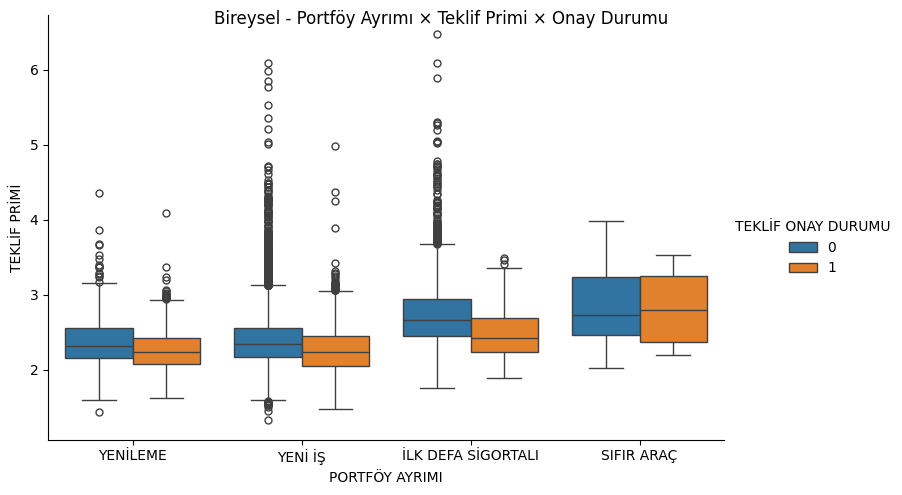

In [1191]:
g = sns.catplot(x="PORTFÖY AYRIMI", y="TEKLİF PRİMİ", hue="TEKLİF ONAY DURUMU", 
                kind="box", data=df_bireysel, height=5, aspect=1.5)
g.fig.suptitle("Bireysel - Portföy Ayrımı × Teklif Primi × Onay Durumu")
plt.show()

- Yenileme müşterileri → en güvenilir ve en kolay onaylanan grup.
- Yeni müşteri kazanımı (Yeni İş, İlk Defa Sigortalı) → en zor gruplar, özellikle yüksek prim tekliflerinde hemen hiç onay yok.
- Sıfır Araç grubu → nispeten daha dengeli ama yine de prim arttıkça onay oranı düşüyor.

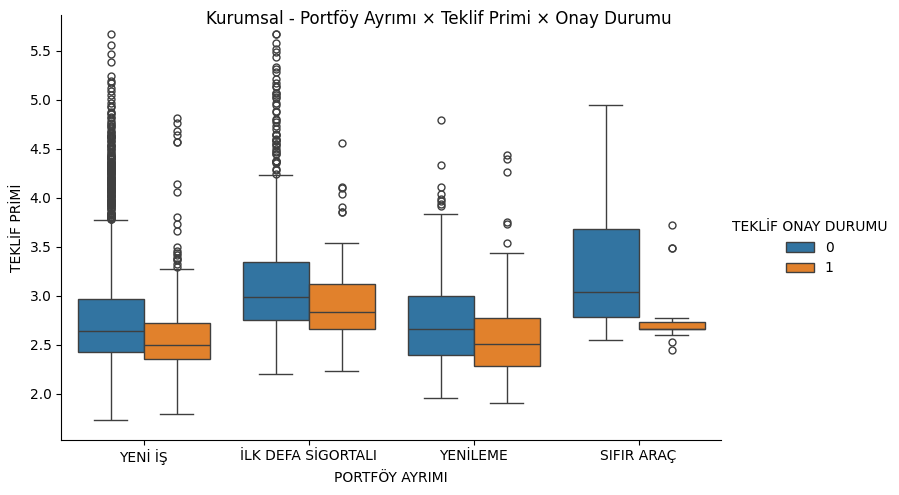

In [1192]:
g = sns.catplot(x="PORTFÖY AYRIMI", y="TEKLİF PRİMİ", hue="TEKLİF ONAY DURUMU", 
                kind="box", data=df_kurumsal, height=5, aspect=1.5)
g.fig.suptitle("Kurumsal - Portföy Ayrımı × Teklif Primi × Onay Durumu")
plt.show()

- Yenileme kurumsallarda da en güvenilir grup, prim düzeyinden bağımsız olarak onaylanma olasılığı yüksek.
- Yeni müşteri kazanımı (Yeni İş, İlk Defa Sigortalı) → fiyat duyarlılığı çok yüksek, özellikle yüksek primlerde onay neredeyse yok.
- Sıfır Araç grubunda onaylanan teklifler var ama yüksek primlerde reddedilme oranı belirgin.

In [1193]:
contingency = pd.crosstab(df_bireysel["İLÇE"], df_bireysel["TEKLİF ONAY DURUMU"])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square:", chi2, "p-value:", p)


Chi-Square: 125.76982355979246 p-value: 0.013381369588683113


p < 0.05 → istatistiksel olarak anlamlı fark var.

Yani ilçe ile teklif onay durumu arasında bağımsızlık yok, yani ilçe değişkeni onay üzerinde etkili.

Başka bir deyişle, bazı ilçelerde müşterilerin teklifi onaylama olasılığı diğer ilçelere göre anlamlı derecede farklı.

### BİREYSEL SİGORTALILAR İÇİN YAPILACAK MODELLEMELER:
#### 1) Lojistik regresyon

In [1194]:
ilce_target = df_bireysel.groupby("İLÇE")["TEKLİF ONAY DURUMU"].mean()
df_bireysel["İLÇE_ENCODED"] = df_bireysel["İLÇE"].map(ilce_target)
df_bireysel = df_bireysel.drop(columns=["İLÇE"])

df_bireysel = pd.get_dummies(
    df_bireysel, 
    columns=["YAKIT TİPİ", "PORTFÖY AYRIMI", "MARKA", "İL"], 
    drop_first=True, 
    dtype=int )

Dummy tuzağına düşmemek için: "drop_first=True" böylelikle ilk kategoriyi (sıfır araç) atıyor. Portföy ayrımında diğerlerinin hepsinin 0 olduğu durum sıfır araç kategorisine denk geliyor.

In [1195]:
# Bağımlı- Bağımsız Değişkenleri Bölme | Teklif onay durumu hedef değişkenimiz (y)
X_bireysel = df_bireysel.drop(columns=["TEKLİF ONAY DURUMU"])
y_bireysel = df_bireysel["TEKLİF ONAY DURUMU"]

In [1196]:
# Test ve eğitim verisi oluşturma
X_train_bireysel, X_test_bireysel, y_train_bireysel, y_test_bireysel = train_test_split(
X_bireysel, y_bireysel, test_size=0.3, stratify=y_bireysel, random_state=42)

In [1197]:
# Veriyi standardize edelim. Çünkü örneğin label encodingte ilçe sütunu 0-500 arası değer alıyor ve bu büyük değerlerin etkisi modele olduğundan fazla görünebilir.
# Böylelikle tüm değişkenler eşit tabandan başlatılır, katsayılar adil karşılaştırılır
scaler = StandardScaler()
X_train_scaled_bireysel = scaler.fit_transform(X_train_bireysel)
X_test_scaled_bireysel = scaler.transform(X_test_bireysel)

In [1198]:
# Model kuralım
log_reg_bireysel = LogisticRegression(max_iter=2000, class_weight="balanced", solver="lbfgs")
log_reg_bireysel.fit(X_train_scaled_bireysel, y_train_bireysel)

LogisticRegression(class_weight='balanced', max_iter=2000)

Accuracy: 0.741
Precision: 0.22
Recall: 0.649
F1-score: 0.329
ROC-AUC: 0.763


<Figure size 300x300 with 0 Axes>

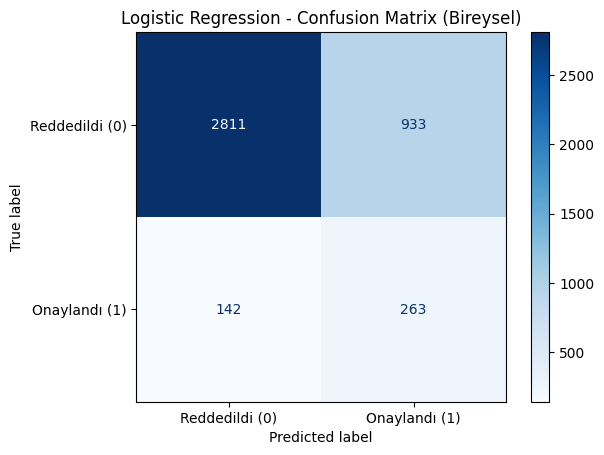

In [1199]:
# Tahminler
y_pred_bireysel = log_reg_bireysel.predict(X_test_scaled_bireysel)
y_proba_bireysel= log_reg_bireysel.predict_proba(X_test_scaled_bireysel)[:,1]

# Metrikler
print("Accuracy:", round(accuracy_score(y_test_bireysel, y_pred_bireysel), 3))
print("Precision:", round(precision_score(y_test_bireysel, y_pred_bireysel), 3))
print("Recall:", round(recall_score(y_test_bireysel, y_pred_bireysel), 3))
print("F1-score:", round(f1_score(y_test_bireysel, y_pred_bireysel), 3))
print("ROC-AUC:", round(roc_auc_score(y_test_bireysel, y_proba_bireysel), 3))

cm = confusion_matrix(y_test_bireysel, y_pred_bireysel)

plt.figure(figsize=(3,3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandı (1)"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Logistic Regression - Confusion Matrix (Bireysel)")
plt.show()

Accuracy: 0.741
→ Modelin genel doğruluk oranı %74. Yani her 4 tahminden 3’ü doğru.

Precision: 0.22
→ “Onaylandı” dediği her 100 müşteriden sadece 22’si gerçekten onay almış.
→ Yani yanlış pozitif (yanlış alarm) oranı yüksek.

Recall: 0.649
→ Onaylı müşterilerin yaklaşık %65’ini yakalayabiliyor.
→ Yani çoğu gerçek “onaylı” teklifi görebiliyor.

F1-score: 0.329
→ Precision düşük ama Recall yüksek → F1 orta seviyede çıktı.

ROC-AUC: 0.763
→ %76 ayrıştırma gücü → modelin reddedilen ve onaylanan müşterileri ayırt etme kabiliyeti fena değil.

Genel Yorumum:
- Model, reddedilenleri çoğunlukla doğru tahmin ediyor, ama onaylıları daha az sayıda doğru tahmin edebiliyor.
- Recall yüksek (%65) → yani model onaylı müşterilerin önemli bir kısmını yakalayabiliyor. Bu, müşteri kaybını azaltmak isteyen bir senaryo için avantaj.
- Ancak Precision düşük (%22) → model çok fazla müşteriye yanlış “onaylandı” dediği için yanlış alarm riski yüksek.
- ROC-AUC 0.76 → modelin ayrıştırma kabiliyeti orta-iyi seviyede.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\2704605168.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="coolwarm")


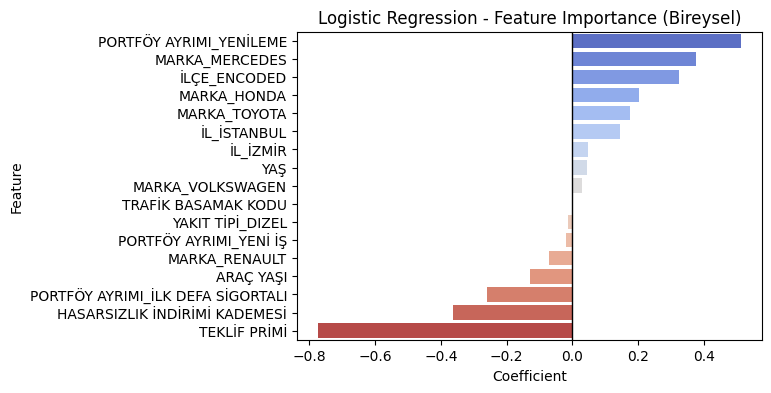

,Feature,Coefficient
8,PORTFÖY AYRIMI_YENİLEME,0.512534
11,MARKA_MERCEDES,0.375656
5,İLÇE_ENCODED,0.324491
10,MARKA_HONDA,0.202630
13,MARKA_TOYOTA,0.175863
15,İL_İSTANBUL,0.146338
16,İL_İZMİR,0.048016
3,YAŞ,0.045173
14,MARKA_VOLKSWAGEN,0.029937
1,TRAFİK BASAMAK KODU,0.001649


In [1200]:
# Katsayıları al
coefficients = log_reg_bireysel.coef_[0]
features = X_train_bireysel.columns

coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

# Görselleştirme
plt.figure(figsize=(6,4))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="coolwarm")
plt.title("Logistic Regression - Feature Importance (Bireysel)")
plt.axvline(0, color="black", linewidth=1)
plt.show()

# İlk 15 özelliği tablo olarak gösterelim
coef_df.head(15)

Pozitif Katsayılar (Onay Olasılığını Artırıyor)

- Portföy Ayrımı_Yenileme (+0.51)
→ Yenileme işlemlerinde teklif onay alma ihtimali en yüksek.
→ Bu çok güçlü bir etki, model için en belirleyici faktör.

- Marka_Mercedes (+0.38), Marka_Honda (+0.20), Marka_Toyota (+0.17)
→ Bu markalara sahip araçların teklif onay alma olasılığı daha yüksek.
→ Demek ki bazı markalar şirketin risk/prim politikalarında avantajlı.

- İlçe_Encoded (+0.32)
→ İlçelerin onay oranına göre encode edilmesi önemli → bazı ilçelerde onay ihtimali daha yüksek.

- İl_İstanbul (+0.14), İl_İzmir (+0.05)
→ İstanbul ve İzmir’de yapılan başvurular, diğer illere göre daha yüksek onay olasılığına sahip.

- Yaş (+0.04)
→ Sigortalının yaşı arttıkça onay ihtimali hafif artıyor.

Negatif Katsayılar (Onay Olasılığını Azaltıyor)

- Teklif Primi (–0.80)
→ Prim arttıkça teklifin onaylanma olasılığı belirgin şekilde azalıyor.
→ Bu, iş açısından çok kritik bir bulgu.

- Hasarsızlık İndirimi Kademesi (–0.26)
→ İndirim kademesi yüksek olan müşterilerde onay ihtimali düşüyor.
→ Bu biraz beklenmedik olabilir, çünkü genelde daha düşük risk demek. Burada model prim ile etkileşimli bir şekilde öğrenmiş olabilir.

- Portföy Ayrımı_İlk Defa Sigortalı (–0.25)
→ İlk kez sigortalı olan müşterilerde onay alma ihtimali düşük.

- Araç Yaşı (–0.12)
→ Araç yaşı arttıkça onay olasılığı azalıyor.

- Marka_Renault (–0.07)
→ Renault marka araçlarda onay olasılığı daha düşük.

- Portföy Ayrımı_Yeni İş (–0.02)
→ Yeni işlerde onay oranı yenilemeye göre düşük.

Genel Yorumum:
- En güçlü pozitif etki: “Yenileme” portföyü → onaylanma ihtimalini en çok artırıyor.
- En güçlü negatif etki: Teklif primi → fiyat yükseldikçe onay olasılığı keskin şekilde azalıyor.
- Marka ve lokasyon (il/ilçe) onay kararlarında önemli rol oynuyor.
- İlk defa sigortalı olmak ve araç yaşının yüksek olması → onay ihtimalini düşürüyor.

### 2) Random Forest

En iyi parametrleri bulmak için tune edelim

In [1201]:
# Parametre aralıkları
param_dist = {
    "n_estimators": [100, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
}

# Model
rf_bireysel = RandomForestClassifier(
    class_weight="balanced", 
    random_state=42, 
    n_jobs=-1
)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_bireysel,
    param_distributions=param_dist,
    n_iter=30,             # kaç farklı kombinasyon denenecek
    scoring="f1",          # dengesiz veri → F1 önemli
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit
random_search.fit(X_train_bireysel, y_train_bireysel)

print("En iyi parametreler:", random_search.best_params_)
print("En iyi F1 skoru:", random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
En iyi parametreler: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30}
En iyi F1 skoru: 0.3394287054859763


In [1202]:
# Final Model
rf_best_bireysel = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="log2",
    max_depth=30,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Eğitme
rf_best_bireysel.fit(X_train_bireysel, y_train_bireysel)

# Tahminler
y_pred_rf_bireysel = rf_best_bireysel.predict(X_test_bireysel)
y_proba_rf_bireysel = rf_best_bireysel.predict_proba(X_test_bireysel)[:,1]

Random Forest Sonuçları (Bireysel - Tuned)
Accuracy: 0.872
Precision: 0.343
Recall: 0.333
F1-score: 0.338
ROC-AUC: 0.744


<Figure size 600x400 with 0 Axes>

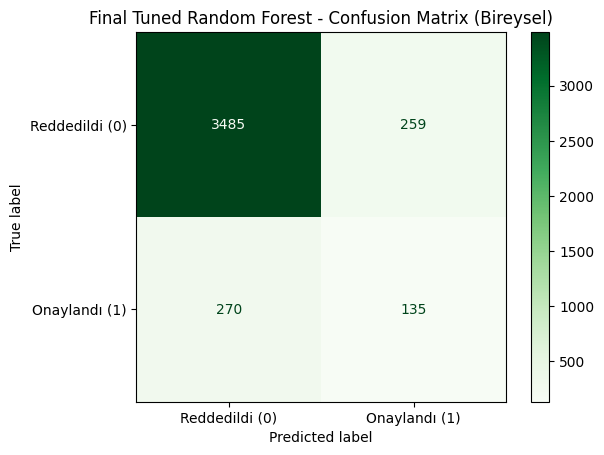

In [1203]:
# Metrikler
print("Random Forest Sonuçları (Bireysel - Tuned)")
print("Accuracy:", round(accuracy_score(y_test_bireysel, y_pred_rf_bireysel), 3))
print("Precision:", round(precision_score(y_test_bireysel, y_pred_rf_bireysel), 3))
print("Recall:", round(recall_score(y_test_bireysel, y_pred_rf_bireysel), 3))
print("F1-score:", round(f1_score(y_test_bireysel, y_pred_rf_bireysel), 3))
print("ROC-AUC:", round(roc_auc_score(y_test_bireysel, y_proba_rf_bireysel), 3))

# Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test_bireysel, y_pred_rf_bireysel)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandı (1)"])
disp.plot(cmap="Greens", values_format="d")
plt.title("Final Tuned Random Forest - Confusion Matrix (Bireysel)")
plt.show()

Accuracy: 0.872
→ Genel doğruluk yüksek görünüyor (%87). Ancak bu, sınıf dengesizliği nedeniyle biraz yanıltıcı olabilir.

Precision: 0.343
→ “Onaylandı” dediği her 3 kişiden 1’i gerçekten onaylı. Yanlış alarmlar azalmış.

Recall: 0.333
→ Onaylı müşterilerin yalnızca %33’ünü yakalayabiliyor. Yani model, çoğu onaylı müşteriyi reddedilmiş gibi tahmin ediyor.

F1-score: 0.338
→ Precision ve Recall dengesi orta düzeyde.

ROC-AUC: 0.744
→ Reddedilen ve onaylananları ayırt etme kabiliyeti orta-iyi seviyede.

Genel Yorum:
- Random Forest güçlü bir şekilde “reddedildi” sınıfına odaklanıyor.
- Precision yükselmiş (yanlış alarmlar azalmış), ama recall düşmüş (onaylı müşteri kaybı artmış).

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\2310335364.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_df, palette="viridis")


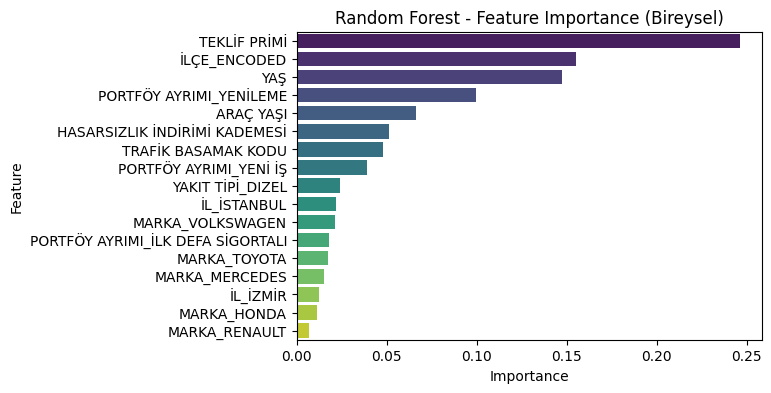

,Feature,Importance
4,TEKLİF PRİMİ,0.246136
5,İLÇE_ENCODED,0.155429
3,YAŞ,0.147264
8,PORTFÖY AYRIMI_YENİLEME,0.099372
2,ARAÇ YAŞI,0.066043
0,HASARSIZLIK İNDİRİMİ KADEMESİ,0.051131
1,TRAFİK BASAMAK KODU,0.048040
7,PORTFÖY AYRIMI_YENİ İŞ,0.039227
6,YAKIT TİPİ_DIZEL,0.023808
15,İL_İSTANBUL,0.021626


In [1204]:
# Feature importance değerlerini al
importances = rf_best_bireysel.feature_importances_
features = X_train_bireysel.columns

fi_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Görselleştirme
plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=fi_df, palette="viridis")
plt.title("Random Forest - Feature Importance (Bireysel)")
plt.show()

# İlk 15 özelliği tablo olarak da gösterelim
fi_df.head(15)

En Önemli Değişkenler:

- Teklif Primi (~0.25)
→ Modelin en çok dikkat ettiği değişken.
→ Prim yükseldikçe onay alma ihtimali ciddi şekilde değişiyor (genelde azalıyor).
- İlçe Encoded (~0.16)
→ İlçeler arasında belirgin farklılıklar var. Bazı ilçelerde onay olasılığı yüksek, bazılarında düşük.
- Yaş (~0.15)
→ Müşteri yaşı önemli bir faktör. Yaş ilerledikçe risk profili ve onay davranışı değişiyor.
- Portföy Ayrımı – Yenileme (~0.10)
→ Yenileme müşterileri çok daha yüksek onay alıyor → sadık müşteri etkisi.

Daha Az Etkili Değişkenler:
- Yakıt Tipi – Dizel (~0.02) → Dizel araçlar için ufak fark var.
- İller (İstanbul, İzmir) (~0.02 civarı) → Bölgesel farklılık sınırlı da olsa mevcut.
- Markalar (Volkswagen, Toyota, Mercedes, Honda, Renault) → Markaların etkisi çok düşük. Bu, Random Forest’ın kararlarında markayı fazla ayırt edici bulmadığını gösteriyor.

Genel Yorum:
- Prim ve demografik faktörler (ilçe, yaş) → en kritik belirleyiciler.
- Sadık müşteri (yenileme) → onay ihtimalini artırıyor.
- Marka, yakıt tipi, il gibi değişkenler görece daha az önem taşıyor.

### 3) XGBoost

En iyi parametrleri bulmak için tune edelim

In [1205]:
# Parametre aralıkları
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 1, 5],
    "scale_pos_weight": [1, 5, 10]   # sınıf dengesizliği için
}

# Model
xgb_bireysel = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV
random_search_xgb_bireysel = RandomizedSearchCV(
    estimator=xgb_bireysel,
    param_distributions=param_dist,
    n_iter=30,            # 30 kombinasyon dene
    scoring="f1",         # dengesiz sınıflar için F1 daha uygun
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search_xgb_bireysel.fit(X_train_bireysel, y_train_bireysel)

print("En iyi parametreler:", random_search_xgb_bireysel.best_params_)
print("En iyi F1 skoru:", random_search_xgb_bireysel.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
En iyi parametreler: {'subsample': 1.0, 'scale_pos_weight': 5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 5, 'colsample_bytree': 1.0}
En iyi F1 skoru: 0.3446795802749441


Final Tuned XGBoost Sonuçları (Bireysel)
Accuracy: 0.863
Precision: 0.329
Recall: 0.385
F1-score: 0.355
ROC-AUC: 0.752


<Figure size 600x400 with 0 Axes>

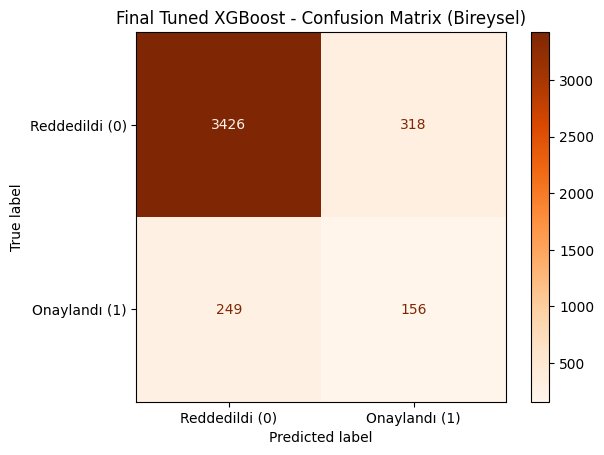

In [1206]:
# Final tuned model
xgb_best_bireysel = XGBClassifier(
    subsample=1.0,
    scale_pos_weight=5,
    n_estimators=300,
    min_child_weight=1,
    max_depth=3,
    learning_rate=0.2,
    gamma=5,
    colsample_bytree=1.0,
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# Eğitme
xgb_best_bireysel.fit(X_train_bireysel, y_train_bireysel)

# Tahminler
y_pred_xgb_bireysel = xgb_best_bireysel.predict(X_test_bireysel)
y_proba_xgb_bireysel = xgb_best_bireysel.predict_proba(X_test_bireysel)[:,1]

# Metrikler
print("Final Tuned XGBoost Sonuçları (Bireysel)")
print("Accuracy:", round(accuracy_score(y_test_bireysel, y_pred_xgb_bireysel), 3))
print("Precision:", round(precision_score(y_test_bireysel, y_pred_xgb_bireysel), 3))
print("Recall:", round(recall_score(y_test_bireysel, y_pred_xgb_bireysel), 3))
print("F1-score:", round(f1_score(y_test_bireysel, y_pred_xgb_bireysel), 3))
print("ROC-AUC:", round(roc_auc_score(y_test_bireysel, y_proba_xgb_bireysel), 3))

# Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test_bireysel, y_pred_xgb_bireysel)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandı (1)"])
disp.plot(cmap="Oranges", values_format="d")
plt.title("Final Tuned XGBoost - Confusion Matrix (Bireysel)")
plt.show()

Accuracy: 0.863
→ Modelin genel doğruluk oranı oldukça yüksek (%86). Ancak bu, reddedilenlerin çok fazla olması nedeniyle yanıltıcı olabilir.

Precision: 0.329
→ “Onaylandı” dediği her 3 kişiden yalnızca 1’i gerçekten onaylanıyor. Yanlış alarmlar hâlâ var ama Logistic Regression’a göre daha yüksek.

Recall: 0.385
→ Onaylı müşterilerin yaklaşık %39’unu yakalayabiliyor. Random Forest’tan biraz daha iyi, ama Logistic Regression’daki kadar yüksek değil.

F1-score: 0.355
→ Precision ve Recall dengesi ortalama seviyede.

ROC-AUC: 0.752
→ Modelin ayrıştırma kabiliyeti (reddedilen vs onaylanan) orta-iyi düzeyde. Random Forest’a benzer, Logistic Regression’a yakın.

Genel Yorumum:
- XGBoost, reddedilenleri çok güçlü şekilde doğru yakalıyor.
- Onaylanan müşterilerin %39’unu yakalıyor (Recall), bu da Random Forest’tan daha iyi.
- Ancak Precision hâlâ düşük, yani “yanlış alarm” riski var.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\1011369664.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_xgb, palette="Oranges")


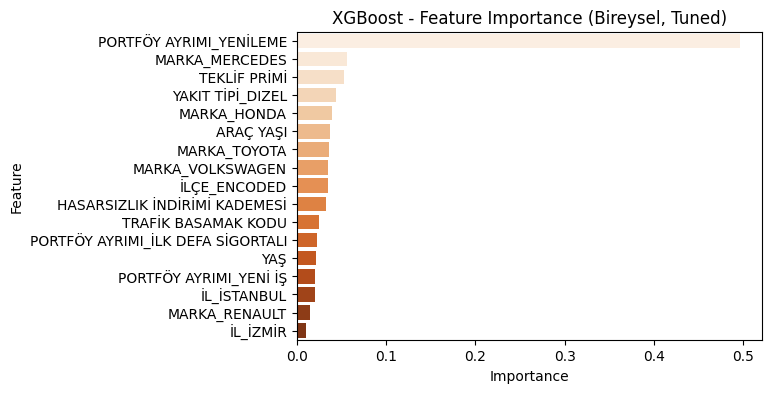

,Feature,Importance
8,PORTFÖY AYRIMI_YENİLEME,0.495716
11,MARKA_MERCEDES,0.056395
4,TEKLİF PRİMİ,0.052625
6,YAKIT TİPİ_DIZEL,0.043400
10,MARKA_HONDA,0.039406
2,ARAÇ YAŞI,0.037536
13,MARKA_TOYOTA,0.036505
14,MARKA_VOLKSWAGEN,0.034990
5,İLÇE_ENCODED,0.034826
0,HASARSIZLIK İNDİRİMİ KADEMESİ,0.032619


In [1207]:
# Feature importance değerlerini al
xgb_importances = xgb_best_bireysel.feature_importances_
features = X_train_bireysel.columns

fi_xgb = pd.DataFrame({
    "Feature": features,
    "Importance": xgb_importances
}).sort_values(by="Importance", ascending=False)

# Görselleştirme
plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=fi_xgb, palette="Oranges")
plt.title("XGBoost - Feature Importance (Bireysel, Tuned)")
plt.show()

# İlk 15 özelliği tablo olarak gösterelim
fi_xgb.head(15)

En Önemli Değişkenler

- Portföy Ayrımı – Yenileme (~0.50)
→ Açık ara en önemli değişken.
→ XGBoost modeli, yenileme müşterilerinin tekliflerinin çok daha yüksek onay ihtimali olduğunu net şekilde öne çıkarıyor.
- Marka – Mercedes (~0.056)
→ Mercedes araç sahipliği, onay kararlarında öne çıkan bir faktör.
- Teklif Primi (~0.056)
→ Fiyat hâlâ önemli bir belirleyici. Prim yükseldikçe onay olasılığı düşüyor.

Orta Etkili Değişkenler
- Yakıt Tipi – Dizel (~0.043)
- Marka Honda / Toyota / Volkswagen (~0.036–0.040)
- Araç Yaşı (~0.038)
- İlçe Encoded (~0.035)

Daha Az Etkili Değişkenler
- Hasarsızlık İndirimi Kademesi (~0.033)
- Trafik Basamak Kodu (~0.024)
- Portföy Ayrımı – İlk Defa Sigortalı (~0.023)
- Yaş (~0.022)
- Portföy Ayrımı – Yeni İş (~0.021)
- İstanbul / İzmir gibi il dummy’leri (~0.02 civarı)
- Marka Renault (~0.019)

Genel Yorumum:
- XGBoost’un çok güçlü bir şekilde vurguladığı nokta:
→ “Yenileme müşterileri onaylanır.”
- İkinci planda fiyat (prim) ve bazı markalar (özellikle Mercedes) öne çıkıyor.
- Diğer değişkenlerin etkisi görece sınırlı (yaş, il, yakıt tipi gibi).

## 📊 Model Karşılaştırması – Bireysel Sigortalılar

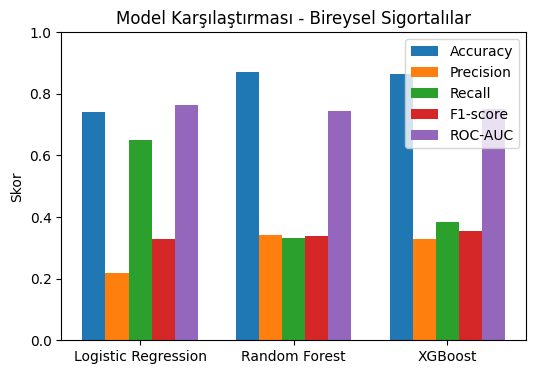

In [1208]:
# Modeller ve metrikler
models = ["Logistic Regression", "Random Forest", "XGBoost"]
accuracy = [0.741, 0.872, 0.863]
precision = [0.220, 0.343, 0.329]
recall = [0.649, 0.333, 0.385]
f1 = [0.329, 0.338, 0.355]
roc_auc = [0.763, 0.744, 0.752]

metrics = [accuracy, precision, recall, f1, roc_auc]
metric_names = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]

x = np.arange(len(models))
bar_width = 0.15

plt.figure(figsize=(6,4))

for i, metric in enumerate(metrics):
    plt.bar(x + i*bar_width, metric, width=bar_width, label=metric_names[i])

plt.xticks(x + bar_width*2, models)
plt.ylim(0,1)
plt.ylabel("Skor")
plt.title("Model Karşılaştırması - Bireysel Sigortalılar")
plt.legend()
plt.show()

| Model                   | Accuracy | Precision | Recall | F1-score | ROC-AUC |
|--------------------------|----------|-----------|--------|----------|---------|
| Logistic Regression      | 0.741    | 0.220     | **0.649** | 0.329    | **0.763** |
| Random Forest (Tuned)    | **0.872** | **0.343** | 0.333  | 0.338    | 0.744   |
| XGBoost (Tuned)          | 0.863    | 0.329     | 0.385  | **0.355** | 0.752   |


- Logistic Regression → Recall en yüksek (onaylanan müşterilerin %65’ini yakalıyor). Ancak precision düşük, yani yanlış alarmlar fazla.
- Random Forest → Accuracy en yüksek (%87). Precision da en iyi, yani yanlış alarmları azaltıyor. Ancak Recall düşük, yani onaylanan müşterilerin çoğunu kaçırıyor.
- XGBoost → Precision ve Recall arasında daha dengeli, F1-score en yüksek çıktı (0.355). ROC-AUC da yüksek (0.752).

### KURUMSAL SİGORTALILAR İÇİN YAPILACAK MODELLEMELER:
#### 1) Lojistik regresyon

In [1209]:
# One-Hot Encoding (0-1 olacak şekilde)
df_kurumsal = pd.get_dummies(
    df_kurumsal, 
    columns=["MARKA", "YAKIT TİPİ", "PORTFÖY AYRIMI", "İL"],
    drop_first=True, 
    dtype=int
)

# Son hali kontrol edelim
df_kurumsal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5255 entries, 3 to 19080
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   HASARSIZLIK İNDİRİMİ KADEMESİ      5255 non-null   float64
 1   TRAFİK BASAMAK KODU                5255 non-null   int64  
 2   ARAÇ YAŞI                          5255 non-null   int64  
 3   TEKLİF PRİMİ                       5255 non-null   float64
 4   TEKLİF ONAY DURUMU                 5255 non-null   int32  
 5   MARKA_HONDA                        5255 non-null   int32  
 6   MARKA_MERCEDES                     5255 non-null   int32  
 7   MARKA_RENAULT                      5255 non-null   int32  
 8   MARKA_TOYOTA                       5255 non-null   int32  
 9   MARKA_VOLKSWAGEN                   5255 non-null   int32  
 10  YAKIT TİPİ_DIZEL                   5255 non-null   int32  
 11  PORTFÖY AYRIMI_YENİ İŞ             5255 non-null   int32  
 

In [1210]:
X = df_kurumsal.drop(columns=["TEKLİF ONAY DURUMU"])
y = df_kurumsal["TEKLİF ONAY DURUMU"]

In [1211]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [1212]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1213]:
# Model
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced", solver="lbfgs", random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Tahminler
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:,1]

Accuracy: 0.637
Precision: 0.291
Recall: 0.603
F1-score: 0.392
ROC-AUC: 0.691


<Figure size 400x400 with 0 Axes>

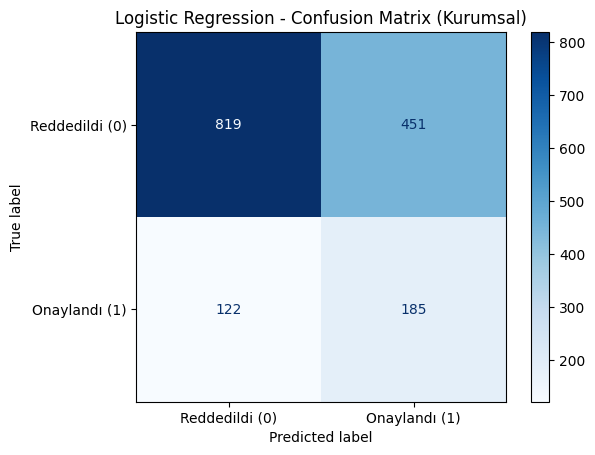

In [1214]:
# Metrikler
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1-score:", round(f1_score(y_test, y_pred), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandı (1)"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Logistic Regression - Confusion Matrix (Kurumsal)")
plt.show()

Accuracy (Doğruluk): 0.637
→ Tüm tahminlerin yaklaşık %64’ü doğru. Ortalama bir başarı.

Precision (Kesinlik): 0.291
→ Model “Onaylandı (1)” dediğinde bunun gerçekten doğru olma olasılığı %29 civarında.
→ Yani yanlış alarmlar (False Positive) yüksek.

Recall (Duyarlılık): 0.603
→ Gerçek onaylanan tekliflerin %60’ını yakalayabilmiş.
→ Yani “müşteri kaybetmeme” açısından fena değil.

F1-score: 0.392
→ Precision düşük ama Recall biraz yüksek → F1 orta seviyede.

ROC-AUC: 0.691
→ Pozitif sınıfı (onay) ayırmadaki genel başarısı orta düzeyde.

Genel Yorumum:
- Logistic Regression kurumsallar için ortalama performans veriyor.
- Recall biraz yüksek olduğu için “müşterinin teklifini onaylama ihtimali olanları yakalama” konusunda bir miktar avantajlı.
- Ama Precision düşük → çok fazla yanlış onaylama var.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\180823123.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=fi_log, palette="coolwarm")


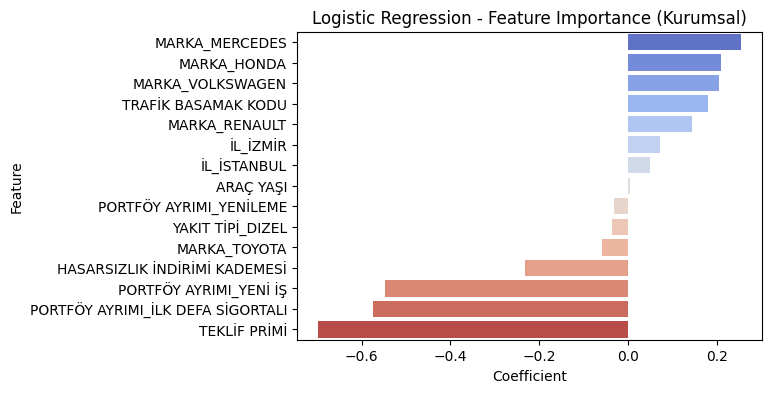

,Feature,Coefficient
5,MARKA_MERCEDES,0.253747
4,MARKA_HONDA,0.209269
8,MARKA_VOLKSWAGEN,0.205735
1,TRAFİK BASAMAK KODU,0.179595
6,MARKA_RENAULT,0.143715
14,İL_İZMİR,0.071172
13,İL_İSTANBUL,0.050611
2,ARAÇ YAŞI,0.004418
11,PORTFÖY AYRIMI_YENİLEME,-0.031528
9,YAKIT TİPİ_DIZEL,-0.035602


In [1215]:
# Katsayıları al
coef = log_reg.coef_[0]
features = X_train.columns

fi_log = pd.DataFrame({
    "Feature": features,
    "Coefficient": coef
}).sort_values(by="Coefficient", ascending=False)

# Görselleştirme
plt.figure(figsize=(6,4))
sns.barplot(x="Coefficient", y="Feature", data=fi_log, palette="coolwarm")
plt.title("Logistic Regression - Feature Importance (Kurumsal)")
plt.show()

# Tabloyu görelim
fi_log

Pozitif Katsayılar (Onay ihtimalini artıran faktörler)
- Marka Mercedes (+0.25), Honda (+0.21), Volkswagen (+0.21), Renault (+0.14)
→ Bu markalar kurumsal müşterilerde teklifin onaylanma ihtimalini yükseltiyor.
- Trafik Basamak Kodu (+0.18)
→ Daha iyi basamakta olan müşterilerin teklifleri daha çok onaylanıyor.
- İl (İzmir +0.07, İstanbul +0.05)
→ Bu illerde kurumsal müşterilerin teklif onay ihtimali biraz daha yüksek.

Negatif Katsayılar (Onay ihtimalini azaltan faktörler)
- Teklif Primi (–0.69)
→ Prim yükseldikçe teklifin onaylanma ihtimali ciddi biçimde düşüyor.
- Portföy Ayrımı – İlk Defa Sigortalı (–0.57), Yeni İş (–0.55)
→ Yeni müşteri ve ilk defa sigortalı olanlarda onay ihtimali daha düşük.
- Hasarsızlık İndirimi Kademesi (–0.23)
→ Kademe yükseldikçe onay ihtimali azalıyor → muhtemelen prim ile korelasyon etkisi.
- Marka Toyota (–0.05)
→ Toyota için onay olasılığı görece daha düşük çıkmış.
- Yakıt Tipi Dizel (–0.03)
→ Dizel araçlar biraz daha düşük onay olasılığına sahip.

Genel Yorumum:
- En güçlü negatif etki → Teklif Primi (yüksek prim onayı ciddi şekilde azaltıyor).
- En güçlü pozitif etki → Mercedes, Honda, Volkswagen gibi markalar.
- Portföy Ayrımı → Yeni veya ilk defa sigortalı müşterilerde onay almak zor.

### 2) Random Forest

In [1216]:
# Parametre aralıkları
param_dist = {
    "n_estimators": [100, 300, 500, 800],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,            # denenecek kombinasyon sayısı
    scoring="f1",         # dengesiz sınıflar için F1 skoru optimize edelim
    cv=3,                 # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("En iyi parametreler:", random_search.best_params_)
print("En iyi F1 skoru:", random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
En iyi parametreler: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
En iyi F1 skoru: 0.402457433700794


In [1217]:
# Final Random Forest modeli
rf_best = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="log2",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Modeli eğit
rf_best.fit(X_train, y_train)

# Tahminler
y_pred_rf = rf_best.predict(X_test)
y_proba_rf = rf_best.predict_proba(X_test)[:,1]

Accuracy: 0.705
Precision: 0.335
Recall: 0.528
F1-score: 0.41
ROC-AUC: 0.698


<Figure size 400x400 with 0 Axes>

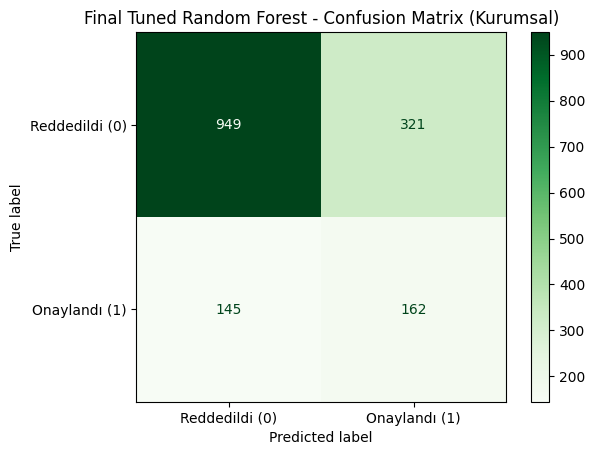

In [1218]:
# Metrikler
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("Precision:", round(precision_score(y_test, y_pred_rf), 3))
print("Recall:", round(recall_score(y_test, y_pred_rf), 3))
print("F1-score:", round(f1_score(y_test, y_pred_rf), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_rf), 3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandı (1)"])
disp.plot(cmap="Greens", values_format="d")
plt.title("Final Tuned Random Forest - Confusion Matrix (Kurumsal)")
plt.show()

- Accuracy (0.705): Model genel doğrulukta %70 başarı sağlıyor. Yani her 10 tekliften 7’sini doğru tahmin ediyor. Ancak dengesiz veri yapısında (reddedilenler daha fazla) accuracy tek başına yeterli bir gösterge değil.
- Recall (0.528): Bu metrik bize “gerçekten onaylanan tekliflerin ne kadarını doğru yakaladık?” sorusunu cevaplıyor. → Model, onaylanan tekliflerin yarısından fazlasını doğru yakalıyor. Bu, müşteri kaybını azaltma açısından olumlu.
- Precision (0.335): Burada düşük bir değer görüyoruz. Yani model “onaylandı” dediğinde, bunun gerçekten doğru olma olasılığı sadece %33.
→ Bu da modelin çok fazla yanlış pozitif (gereksiz onay) verdiğini gösteriyor. Şirket açısından bu riskli çünkü yanlış fiyatlandırma veya yanlış onaydan kâr kaybı oluşabilir.
- F1-score (0.41): Precision ve Recall’un dengeli bir ortalaması. Orta seviyede bir performans, ama daha iyi optimize edilmesi gerektiğini gösteriyor.
- ROC-AUC (0.698): %70’e yakın bir ayırma gücü var. Yani model, onaylanan ve reddedilen teklifleri ayırmada orta seviyede başarılı.

Genel Yorumum:
- Model, müşteri kaybını azaltma (Recall) yönünde fena değil, fakat kârlılığı koruma (Precision) yönünde zayıf.
- İş hedefi “portföyü büyütmek” ise bu model başlangıç için kullanılabilir, çünkü daha fazla müşteriyi onaylama eğiliminde.
- Ama iş hedefi “kârı korumak” ise precision düşük olduğu için riskli.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\265841783.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_rf, palette="viridis")


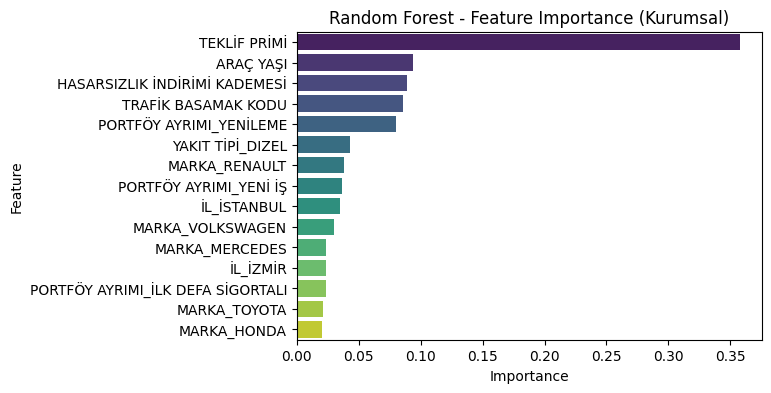

,Feature,Importance
3,TEKLİF PRİMİ,0.357505
2,ARAÇ YAŞI,0.093822
0,HASARSIZLIK İNDİRİMİ KADEMESİ,0.088735
1,TRAFİK BASAMAK KODU,0.085440
11,PORTFÖY AYRIMI_YENİLEME,0.080373
9,YAKIT TİPİ_DIZEL,0.043174
6,MARKA_RENAULT,0.037770
10,PORTFÖY AYRIMI_YENİ İŞ,0.036384
13,İL_İSTANBUL,0.034630
8,MARKA_VOLKSWAGEN,0.030034


In [1219]:
# Feature importance al
importances = rf_best.feature_importances_
features = X_train.columns

fi_rf = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Görselleştirme
plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=fi_rf, palette="viridis")
plt.title("Random Forest - Feature Importance (Kurumsal)")
plt.show()

# Tabloyu görelim
fi_rf

Teklif Primi (0.36)
- Açık ara en önemli değişken. Teklif priminin yüksek/düşük olması, teklifin onaylanıp onaylanmamasında çok kritik bir rol oynuyor.
- Bu beklenen bir durum çünkü prim müşterinin kararında en doğrudan etki eden faktör.

Araç Yaşı (0.094)
- Araç yaşı arttıkça risk artıyor, dolayısıyla teklif onay oranı da değişiyor.
- Prim dışında en önemli faktörlerden biri.

Hasarsızlık İndirimi Kademesi (0.089)
- Hasarsızlık indirimi, müşteri sadakati ve risk düzeyinin göstergesi olduğu için modelde yüksek önem kazanmış.

Trafik Basamak Kodu (0.085)
- Müşterinin geçmiş sürücü davranışlarını yansıttığı için onay kararını ciddi şekilde etkiliyor.

Portföy Ayrımı – Yenileme (0.080)
- Yenileme müşterileri (mevcut müşteriler) genellikle daha kolay onaylanıyor.
- Bu değişkenin yüksek etkisi de portföy yönetimi açısından önemli bir bulgu.

Orta Düzeyde Etkili Değişkenler:
- Yakıt Tipi (0.043), Marka_Renault (0.037), Portföy Ayrımı_Yeni İş (0.036), İstanbul/İzmir illeri (0.035 civarı) orta düzeyde önem taşıyor.
- Bu değişkenler müşteri segmentasyonu açısından etkili olabilir ama prim, araç yaşı ve hasarsızlık kadar kritik değil.

Daha Az Önemli Değişkenler
- Marka (Toyota, Mercedes, Honda, Volkswagen) → her biri %2-3 civarında etkiye sahip.
- Yani marka tercihi, teklifin onaylanmasında çok belirleyici bir faktör değil.
- İller (İstanbul, İzmir) düşük önem taşıyor → belki bölgesel risk farklılıklarını yansıtıyor ama düşük seviyede.

In [1220]:
# Parametre aralıkları
param_dist = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 1, 5],
    "scale_pos_weight": [1, 3, 5, 10]  # dengesiz sınıflar için
}

# Random Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,          # kaç kombinasyon denenecek
    scoring="f1",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit et
random_search.fit(X_train, y_train)

print("En iyi parametreler:", random_search.best_params_)
print("En iyi F1 skoru:", random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
En iyi parametreler: {'subsample': 0.8, 'scale_pos_weight': 5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
En iyi F1 skoru: 0.4161332632743803


Accuracy: 0.581
Precision: 0.277
Recall: 0.717
F1-score: 0.4
ROC-AUC: 0.699


<Figure size 600x400 with 0 Axes>

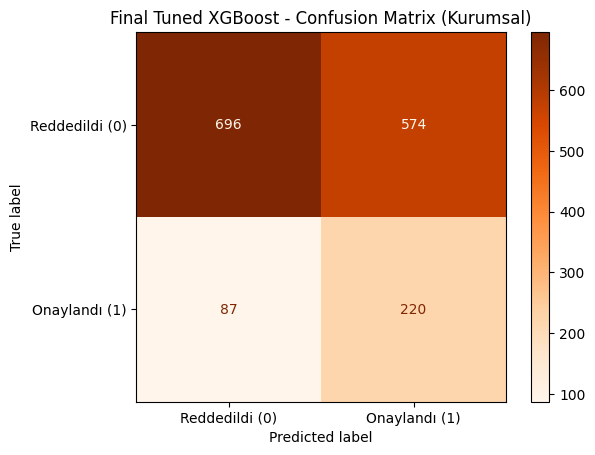

In [1221]:
# Final Model
xgb_best = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    subsample=0.8,
    scale_pos_weight=5,
    n_estimators=300,
    min_child_weight=1,
    max_depth=5,
    learning_rate=0.01,
    gamma=0,
    colsample_bytree=0.8,
    random_state=42
)

# Eğitme
xgb_best.fit(X_train, y_train)

# Tahminler
y_pred = xgb_best.predict(X_test)
y_proba = xgb_best.predict_proba(X_test)[:, 1]

# Metrikler
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1-score:", round(f1_score(y_test, y_pred), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))

# Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandı (1)"])
disp.plot(cmap="Oranges", values_format="d")
plt.title("Final Tuned XGBoost - Confusion Matrix (Kurumsal)")
plt.show()

Accuracy (0.581)
Genel doğruluk düşük görünüyor çünkü veri dengesiz → çok fazla reddedilen teklif var. Dolayısıyla accuracy tek başına yanıltıcı.

Precision (0.277)
Modelin “onaylandı” dediği tekliflerin sadece %27’si gerçekten onaylanmış. Yani yanlış pozitif oranı yüksek.
→ Sigorta açısından: Model çok fazla “onay” tahmini yapıyor ama bunların çoğu yanlış çıkıyor.

Recall (0.717)
Burada güçlü bir nokta var: Gerçekten onaylanan tekliflerin %71.7’sini yakalayabiliyor.
→ Yani model “Onay olacak teklifleri kaçırmıyor”. Bu, iş açısından önemli olabilir. Çünkü firmalar için onaylanabilecek teklifleri atlamamak daha kritik olabilir.

F1-score (0.400)
Precision ve Recall’un harmonik ortalaması. Görece düşük ama recall’in yüksekliği sayesinde bir denge sağlanmış.

ROC-AUC (0.699)
Sınıflar arasında ayrım yapma gücü %70 civarında. Mükemmel değil ama anlamlı bir ayrıştırma var.

Genel yorumum:
- Modelin en güçlü yanı: Onaylanan teklifleri (pozitif sınıf) büyük oranda yakalaması.
- En zayıf yanı: Çok fazla yanlış onay (false positive) vermesi.

C:\Users\incie\AppData\Local\Temp\ipykernel_18312\4173731493.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_xgb, palette="magma")


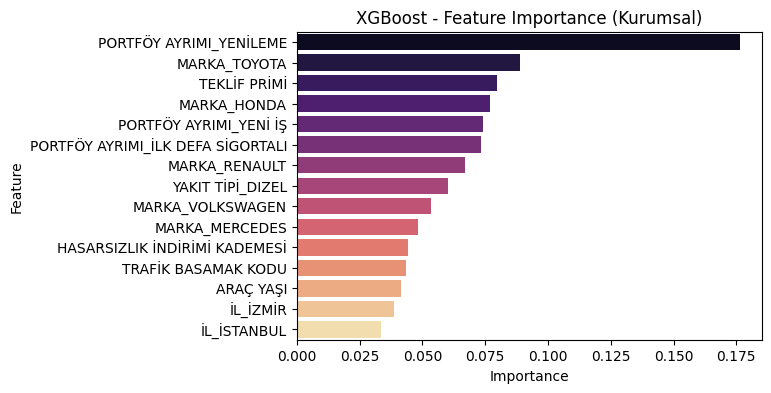

,Feature,Importance
11,PORTFÖY AYRIMI_YENİLEME,0.176326
7,MARKA_TOYOTA,0.088713
3,TEKLİF PRİMİ,0.079917
4,MARKA_HONDA,0.076838
10,PORTFÖY AYRIMI_YENİ İŞ,0.074343
12,PORTFÖY AYRIMI_İLK DEFA SİGORTALI,0.073407
6,MARKA_RENAULT,0.066995
9,YAKIT TİPİ_DIZEL,0.060320
8,MARKA_VOLKSWAGEN,0.053310
5,MARKA_MERCEDES,0.048317


In [1222]:
# Feature importance al (XGBoost - Kurumsal)
importances = xgb_best.feature_importances_
features = X_train.columns

fi_xgb = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Görselleştirme
plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=fi_xgb, palette="magma")
plt.title("XGBoost - Feature Importance (Kurumsal)")
plt.show()

# Tabloyu görelim
fi_xgb

- PORTFÖY AYRIMI_YENİLEME (0.176): Kurumsal tekliflerin onaylanmasında en kritik değişken. Yenileme başvurularının geçmiş müşteri ilişkilerinden dolayı daha güvenilir olması çok mantıklı.
- MARKA_TOYOTA (0.089): Araç markası özellikle Toyota için önemli bir ayırt edici faktör. Belki bu marka özelinde kaza/prim istatistikleri sigorta şirketleri için daha pozitif.
- TEKLİF PRİMİ (0.080): Prim miktarı da etkili fakat bireyseldeki kadar güçlü değil. Kurumsalda portföy politikaları daha belirleyici gibi görünüyor.
- MARKA_HONDA, PORTFÖY AYRIMI_YENİ İŞ, PORTFÖY AYRIMI_İLK DEFA SİGORTALI (0.07–0.08 arası): Kurumsal teklifin yeni mi, ilk mi, yoksa başka bir statüde mi olduğu onay kararını ciddi şekilde etkiliyor.
- Markalar (Renault, Volkswagen, Mercedes) de ~0.05 seviyelerinde etkili, yani marka değişkeni kurumsalda bireyselden daha güçlü.
- HASARSIZLIK İNDİRİMİ KADEMESİ ve TRAFİK BASAMAK KODU (~0.04): Bu değişkenler geçmiş risk profilini yansıttığı için doğal olarak etkili ama prim/portföy kadar belirleyici değiller.
- İller (İstanbul, İzmir) en düşük önem seviyesinde. Kurumsal sigortada coğrafi farklar, bireyselde olduğu kadar ayırt edici değil.

## 📊 Model Karşılaştırması – Kurumsal Sigortalılar

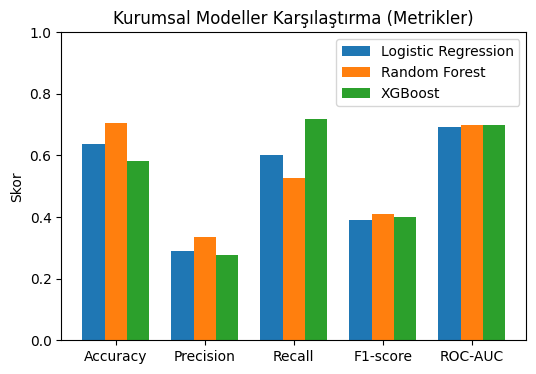

In [1223]:
# Modellerin isimleri
models = ["Logistic Regression", "Random Forest", "XGBoost"]

# Her modelin metrik değerleri (senin sonuçlarına göre dolduruldu)
accuracy = [0.637, 0.705, 0.581]
precision = [0.291, 0.335, 0.277]
recall = [0.603, 0.528, 0.717]
f1 = [0.392, 0.410, 0.400]
roc_auc = [0.691, 0.698, 0.699]

# Tüm metrikleri bir araya toplayalım
metrics = [accuracy, precision, recall, f1, roc_auc]
metric_names = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]

# Çizim ayarları
x = np.arange(len(metric_names))  # metriklerin konumu
width = 0.25  # bar genişliği

fig, ax = plt.subplots(figsize=(6,4))

# Her model için bar plot
ax.bar(x - width, [m[0] for m in metrics], width, label=models[0])
ax.bar(x, [m[1] for m in metrics], width, label=models[1])
ax.bar(x + width, [m[2] for m in metrics], width, label=models[2])

# Ayarlar
ax.set_ylabel("Skor")
ax.set_title("Kurumsal Modeller Karşılaştırma (Metrikler)")
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend()

plt.ylim(0, 1)
plt.show()

| Metric       | Logistic Regression | Random Forest (Tuned) | XGBoost (Tuned) |
|--------------|----------------------|------------------------|-----------------|
| Accuracy     | 0.637                | **0.705**              | 0.581           |
| Precision    | 0.291                | **0.335**              | 0.277           |
| Recall       | 0.603                | 0.528                  | **0.717**       |
| F1-score     | 0.392                | **0.410**              | 0.400           |
| ROC-AUC      | 0.691                | **0.698**              | 0.699           |

- Accuracy: En yüksek doğruluk oranı Random Forest’ta (%70,5).
- Precision: Random Forest en yüksek (%33,5). Yani pozitif tahmin yaptığında daha güvenilir.
- Recall: XGBoost çok önde (%71,7). Yani onaylanan tekliflerin çoğunu yakalayabiliyor.
- F1-score: Random Forest ve XGBoost birbirine yakın, Random Forest biraz önde.
- ROC-AUC: Tüm modeller benzer seviyede (~0.69–0.70).

### ENSEMBLE

### Neden Ensemble Yöntemi Kullandık?

Her bir makine öğrenmesi algoritmasının güçlü ve zayıf yönleri vardır.  
- **Logistic Regression**: Yorumlanabilirliği yüksek, lineer ilişkileri güçlü bir şekilde yakalayabilen bir modeldir. Ancak karmaşık, non-lineer ilişkilerde sınırlı kalmaktadır.  
- **Random Forest**: Non-lineer yapıları ve değişkenler arası etkileşimleri başarılı bir şekilde modelleyebilir. Fakat çoğunluk sınıfa odaklanma eğilimi nedeniyle pozitif sınıf (onaylanan teklifler) tahminlerinde zayıf kalabilmektedir.  
- **XGBoost**: Karmaşık ilişkileri öğrenmede çok güçlüdür ve sınıf dengesizliği için ayarlanabilir. Ancak doğru parametre seçimi yapılmazsa aşırı öğrenme (overfitting) riski taşıyabilir.  

### Sağladığı Katkılar
- **Müşteri kaybını azaltmak:** Onaylanma ihtimali yüksek teklifleri daha doğru şekilde yakalıyoruz.  
- **Kârlılığı korumak:** Yanlış onayların sayısını düşürerek şirketin riskini azaltıyoruz.  
- **Dengeli performans:** Bir modelin eksik kaldığı yerde diğer modelin güçlü yönünden faydalanıyoruz.  
- **Daha güvenilir tahminler:** Farklı algoritmaların ortak görüşüne dayalı kararlar daha kararlı ve genellenebilir oluyor.  

### Nasıl Uygulayacağız
- Logistic Regression, Random Forest ve XGBoost modellerini ayrı ayrı çalıştıracağız.  
- Daha sonra **Voting Classifier** yaklaşımıyla bu üç modeli bir araya getireceğiz.  
- Böylece tek bir modele bağlı kalmadan, **daha dengeli ve güvenilir sonuçlar** elde edeceğiz.  

In [1224]:
# Bireyseller için final modeller (önceden tuning yapılmış parametrelerle)
log_reg_bireysel = LogisticRegression(
    max_iter=2000, 
    class_weight="balanced", 
    solver="lbfgs", 
    random_state=42
)

rf_best_bireysel = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="log2",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

xgb_best_bireysel = XGBClassifier(
    subsample=1.0,
    scale_pos_weight=5,
    n_estimators=300,
    min_child_weight=1,
    max_depth=3,
    learning_rate=0.2,
    gamma=5,
    colsample_bytree=1.0,
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

In [1225]:
# Ensemble - Soft Voting
voting_bireysel = VotingClassifier(
    estimators=[
        ("lr_bireysel", log_reg_bireysel),
        ("rf_bireysel", rf_best_bireysel),
        ("xgb_bireysel", xgb_best_bireysel)
    ],
    voting="soft"
)
# Ensemble modeli eğit
voting_bireysel.fit(X_train_scaled_bireysel, y_train_bireysel)

VotingClassifier(estimators=[('lr_bireysel',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=2000,
                                                 random_state=42)),
                             ('rf_bireysel',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=30,
                                                     max_features='log2',
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('xgb_bireysel',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [1226]:
# Tahminler
y_pred_vote_bireysel = voting_bireysel.predict(X_test_scaled_bireysel)
y_proba_vote_bireysel = voting_bireysel.predict_proba(X_test_scaled_bireysel)[:, 1]

Ensemble (Voting Classifier) Sonuçları - Bireysel
Accuracy: 0.856
Precision: 0.32
Recall: 0.422
F1-score: 0.364
ROC-AUC: 0.763


<Figure size 400x400 with 0 Axes>

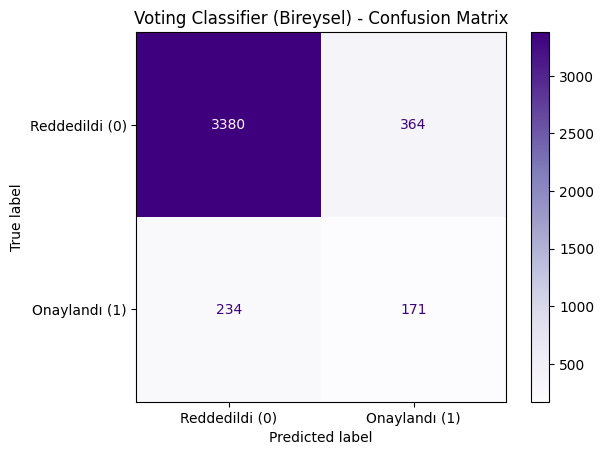

In [1227]:
# Metrikler
print("Ensemble (Voting Classifier) Sonuçları - Bireysel")
print("Accuracy:", round(accuracy_score(y_test_bireysel, y_pred_vote_bireysel), 3))
print("Precision:", round(precision_score(y_test_bireysel, y_pred_vote_bireysel), 3))
print("Recall:", round(recall_score(y_test_bireysel, y_pred_vote_bireysel), 3))
print("F1-score:", round(f1_score(y_test_bireysel, y_pred_vote_bireysel), 3))
print("ROC-AUC:", round(roc_auc_score(y_test_bireysel, y_proba_vote_bireysel), 3))

# Confusion Matrix
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test_bireysel, y_pred_vote_bireysel)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Reddedildi (0)", "Onaylandı (1)"])
disp.plot(cmap="Purples", values_format="d")
plt.title("Voting Classifier (Bireysel) - Confusion Matrix")
plt.show()

- Accuracy: %85.6 oldukça yüksek. Model genel sınıfları doğru ayırıyor.
- Precision: %32 → Onay (1) tahmini yaptığında üçte biri doğru çıkıyor.
- Recall: %42.2 → Onaylanan tekliflerin %42’sini yakalayabiliyor, bu önceki tek modellerden biraz daha dengeli.
- F1-score: %36.4 → Precision ve Recall arasında dengeli bir sonuç.
- ROC-AUC: %76.3 → Sınıfları ayırma gücü iyi seviyede, yani model olasılık tahminlerinde güçlü.

Özet:
- Ensemble (Voting Classifier), tek tek Logistic Regression, Random Forest ve XGBoost modellerinden daha dengeli bir performans veriyor.
- Özellikle ROC-AUC değerinin yükselmesi, modelin sınıfları ayırma başarısının arttığını gösteriyor.
- Precision hâlâ düşük ama Recall ve genel denge açısından Ensemble daha avantajlı.

In [1228]:
# Modelleri tanımla (önceden eğittiğimiz parametrelerle)
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced", solver="lbfgs")
rf_best = RandomForestClassifier(
    n_estimators=100, 
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="log2",
    max_depth=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
xgb_best = XGBClassifier(
    subsample=0.8,
    scale_pos_weight=5,
    n_estimators=300,
    min_child_weight=1,
    max_depth=5,
    learning_rate=0.01,
    gamma=0,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

In [1229]:
# Ensemble modeli oluştur (soft → olasılıkları ortalıyor)
voting_kurumsal = VotingClassifier(
    estimators=[
        ("LogReg", log_reg),
        ("RandomForest", rf_best),
        ("XGBoost", xgb_best)
    ],
    voting="soft"
)

# Modeli eğit
voting_kurumsal.fit(X_train, y_train)

VotingClassifier(estimators=[('LogReg',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=2000)),
                             ('RandomForest',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=10,
                                                     max_features='log2',
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=N...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [1230]:
# Tahminler
y_pred_vote = voting_kurumsal.predict(X_test)
y_proba_vote = voting_kurumsal.predict_proba(X_test)[:, 1]

Accuracy: 0.66
Precision: 0.317
Recall: 0.648
F1-score: 0.426
ROC-AUC: 0.703


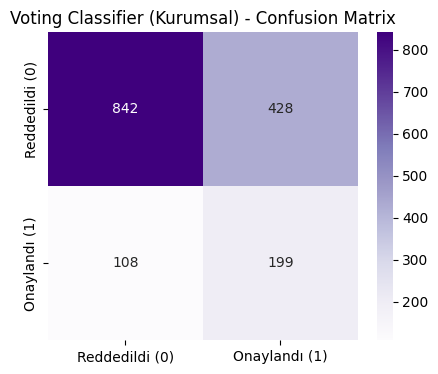

In [1231]:
# Metrikler
print("Accuracy:", round(accuracy_score(y_test, y_pred_vote), 3))
print("Precision:", round(precision_score(y_test, y_pred_vote), 3))
print("Recall:", round(recall_score(y_test, y_pred_vote), 3))
print("F1-score:", round(f1_score(y_test, y_pred_vote), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_vote), 3))

# Confusion Matrix görselleştirme
cm = confusion_matrix(y_test, y_pred_vote)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["Reddedildi (0)", "Onaylandı (1)"], 
            yticklabels=["Reddedildi (0)", "Onaylandı (1)"])
plt.title("Voting Classifier (Kurumsal) - Confusion Matrix")
plt.show()

- Recall çok güçlü (0.648) → Ensemble model, onaylanan tekliflerin büyük kısmını yakalıyor. Bu, özellikle müşteri kaybını önlemek isteyen sigorta şirketleri için değerli.
- Precision düşük (0.317) → Onaylandı dediği tekliflerin üçte ikisi yanlış. Yani model “fazla olumlu” davranıyor.
- Accuracy orta seviye (0.66) → Genel doğruluk dengeli ama çok yüksek değil.
- F1-score (0.426) → Precision ve recall arasında dengeli bir ortalama.
- ROC-AUC (0.703) → Sınıfları ayırt etme gücü oldukça iyi seviyede.